Experiments with lstm

In [16]:
from utils.paths import TMP_DIR
from utils.paths import ML_FLOW_DIR
from autoregression.utils_ar import prepare_direct_lstm_data,prepare_recursive_lstm_data, run_direct_lstm_experiment, run_recursive_lstm_experiment
from evaluation import evalresu as er
import mlflow
mlflow.set_tracking_uri(ML_FLOW_DIR)



In [2]:
import joblib
n_past_values=100
n_future_values=20
input_shape=(n_past_values,1)

Data preparation

In [3]:
data = joblib.load(TMP_DIR / 'output1_smoothed_RTS.pkl')

In [4]:

X_train_dir, y_train_dir,X_val_dir,y_val_dir,X_test_dir,y_test_dir = prepare_direct_lstm_data(data,n_past_values,n_future_values)
X_train_rec, y_train_rec,X_val_rec,y_val_rec,X_test_rec,y_test_rec = prepare_recursive_lstm_data(data,n_past_values)

Direct Multioutput Model

In [6]:
from autoregression.models.DirMultiLSTM import build_direct_lstm_model_simple,build_advanced_direct_lstm, build_direct_model_avg

Direct Simple 128 units

Model: "Direct_LSTM_Model_simple"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_layer (LSTM)               │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,140 (270.08 KB)

 Trainable params: 69,140 (270.08 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
516/517 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0243 - mae: 0.0787 - mse: 0.0243
Epoch 1: val_loss improved from inf to 0.00111, saving model to models/saved/Direct_LSTM_Model_simple.keras
517/517 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - loss: 0.0242 - mae: 0.0785 - mse: 0.0242 - val_loss: 0.0011 - val_mae: 0.0264 - val_mse: 0.0011 - learning_rate: 0.0010
Epoch 2/100
516/517 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0012 - mae: 0.0268 - mse: 0.0012
Epoch 2: val_loss improved from 0.00111 to 0.00108, saving model to models/saved/Direct_LSTM_Model_simple.keras
517/517 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - loss: 0.0012 - mae: 0.0267 - mse: 0.0012 - val_loss: 0.0011 - val_mae: 0.0260 - val_mse: 0.0011 - learning_rate: 0.0010
Epoch 3/100
516/517 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0011 - mae: 0.0254 - mse: 0.0011
Epoch 3: val_loss improved from 0.00108 to 0.00104, saving model to models/saved/Direct_LSTM_Model_simple.keras
517/517 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - lo

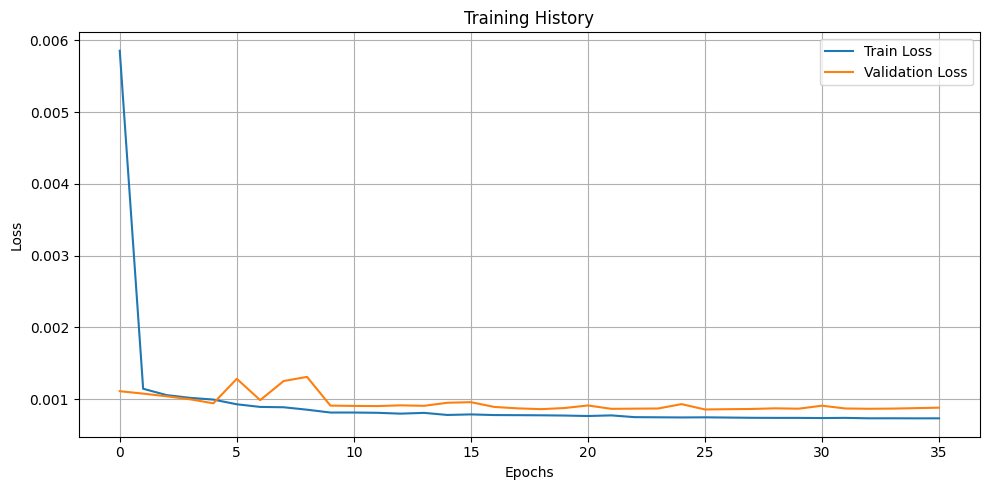

169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step
  Metric       Value
0    MSE    0.001208
1    MAE    0.027549
2   RMSE    0.034753
3     R2    0.283656
4   MAPE    5.342736
5  SMAPE    5.303017
6    SAE  148.405247


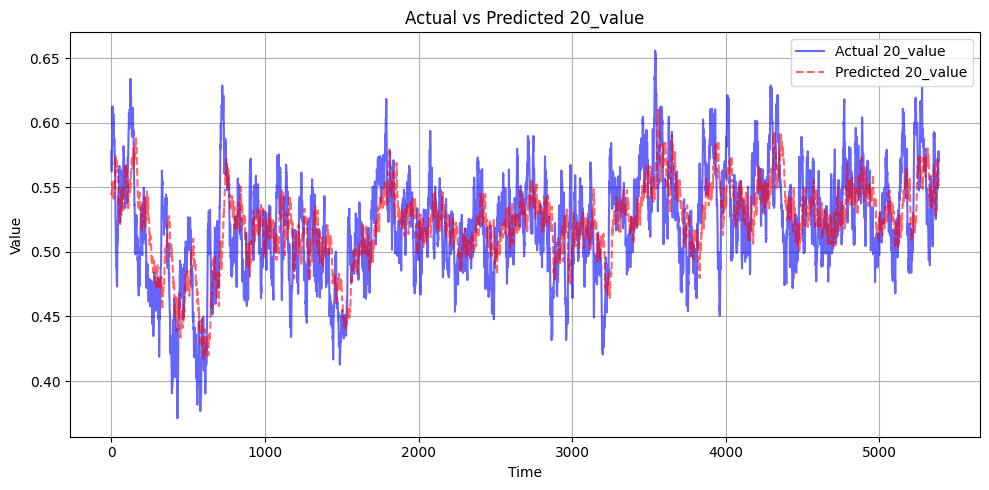

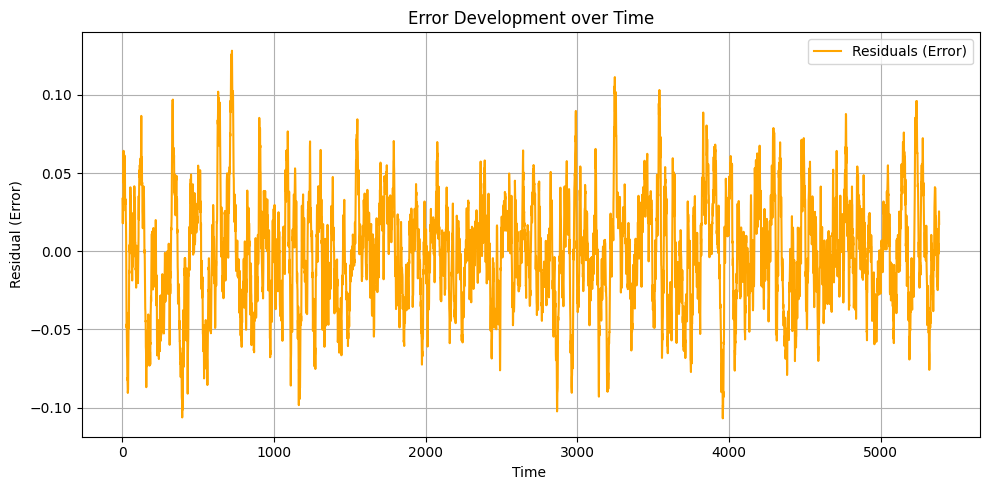

  Metric     Value
0    MSE  0.000515
1    MAE  0.020295
2   RMSE  0.022692
3     R2 -5.076944
4   MAPE  3.552255
5  SMAPE  3.632339
6    SAE  0.405899


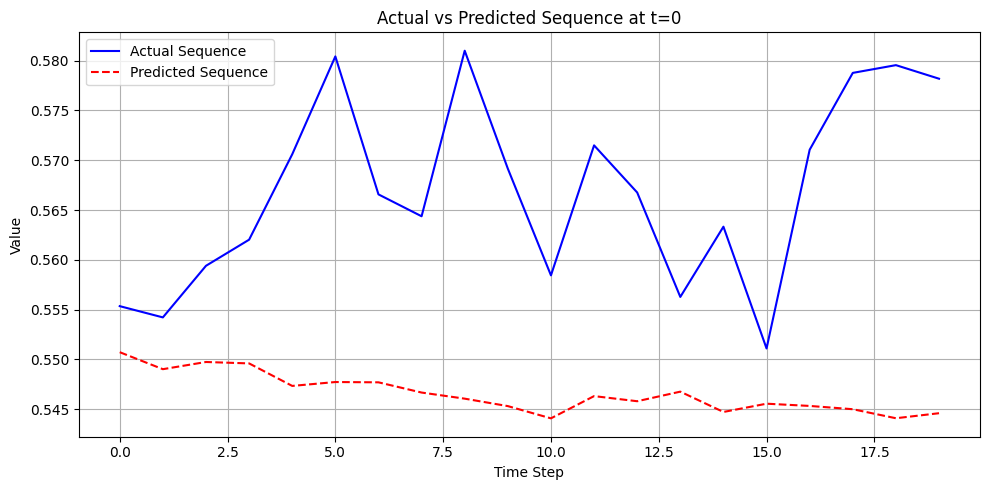

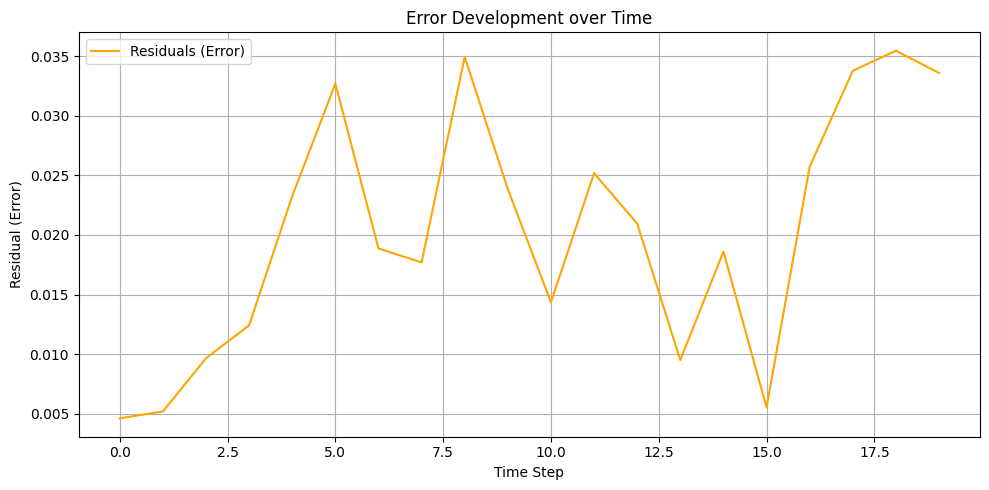

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Registered model 'Direct_LSTM_Model_simple' already exists. Creating a new version of this model...
Created version '7' of model 'Direct_LSTM_Model_simple'.


In [7]:
run_direct_lstm_experiment(
    build_direct_lstm_model_simple,
    'simple',
    'direct_simple',
    X_train_dir,
    y_train_dir,
    X_val_dir,
    y_val_dir,
    X_test_dir,
    y_test_dir,
    20,epochs=100,lstm_units=128)

Direct Simple

Model: "Direct_LSTM_Model_simple"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_layer (LSTM)               │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 20)             │         1,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,196 (71.08 KB)

 Trainable params: 18,196 (71.08 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
514/517 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0342 - mae: 0.0973 - mse: 0.0342
Epoch 1: val_loss improved from inf to 0.00111, saving model to models/saved/Direct_LSTM_Model_simple.keras
517/517 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - loss: 0.0340 - mae: 0.0969 - mse: 0.0340 - val_loss: 0.0011 - val_mae: 0.0264 - val_mse: 0.0011 - learning_rate: 0.0010
Epoch 2/100
515/517 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0011 - mae: 0.0257 - mse: 0.0011
Epoch 2: val_loss did not improve from 0.00111
517/517 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 0.0011 - mae: 0.0257 - mse: 0.0011 - val_loss: 0.0012 - val_mae: 0.0273 - val_mse: 0.0012 - learning_rate: 0.0010
Epoch 3/100
514/517 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0011 - mae: 0.0253 - mse: 0.0011
Epoch 3: val_loss improved from 0.00111 to 0.00105, saving model to models/saved/Direct_LSTM_Model_simple.keras
517/517 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 0.0011 - mae: 0.0253 - mse: 0.0011 - val_loss: 0.0010 - val_m

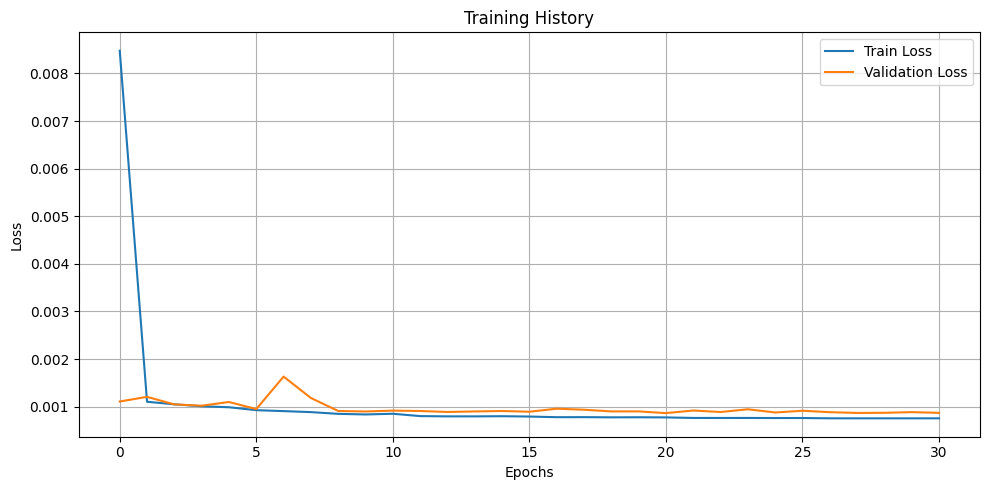

169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
  Metric       Value
0    MSE    0.001269
1    MAE    0.028276
2   RMSE    0.035626
3     R2    0.247226
4   MAPE    5.398491
5  SMAPE    5.453155
6    SAE  152.324620


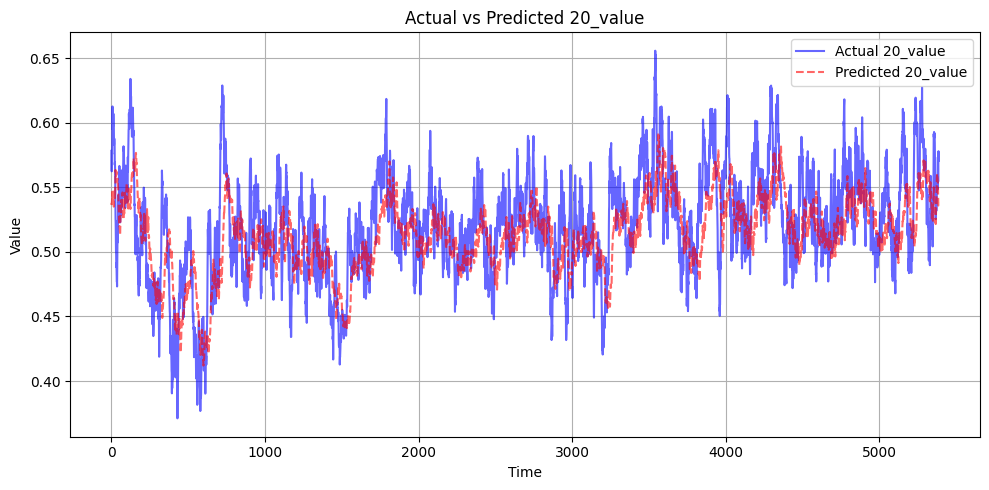

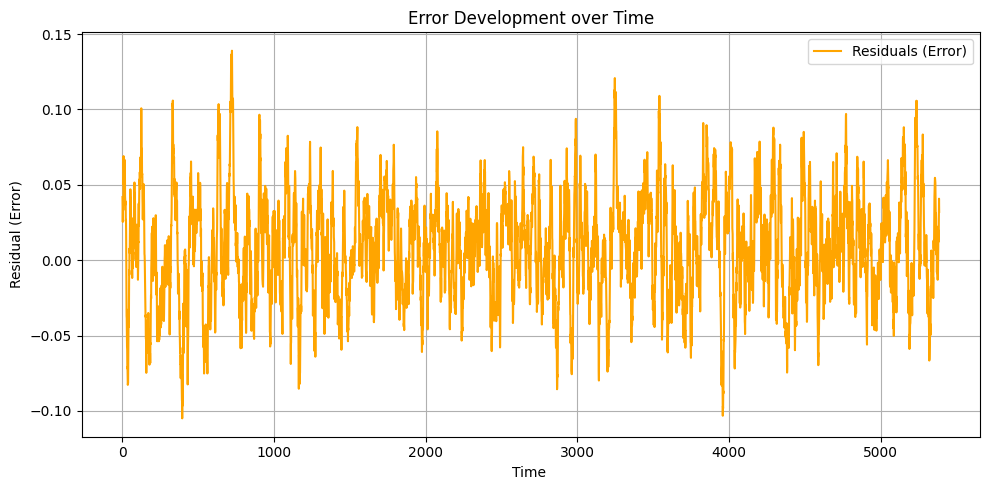

  Metric     Value
0    MSE  0.000675
1    MAE  0.023337
2   RMSE  0.025978
3     R2 -6.964384
4   MAPE  4.087724
5  SMAPE  4.193266
6    SAE  0.466740


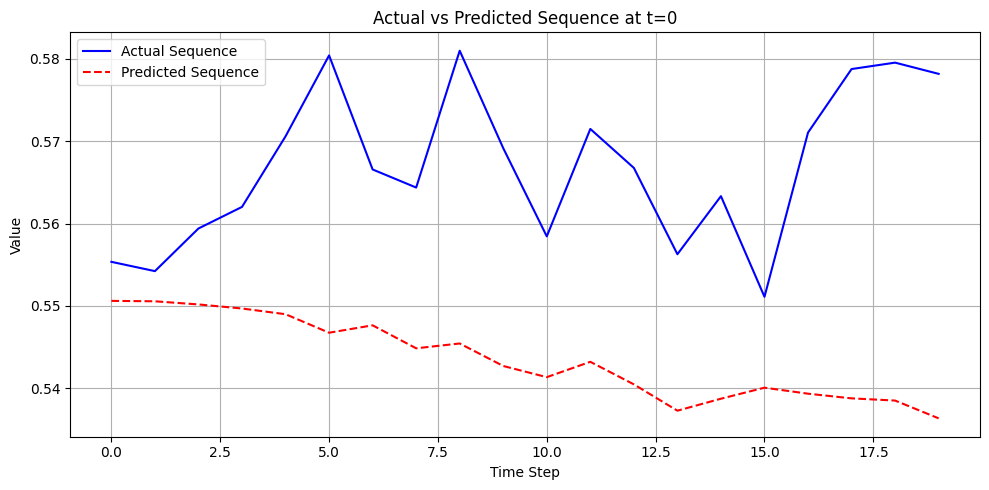

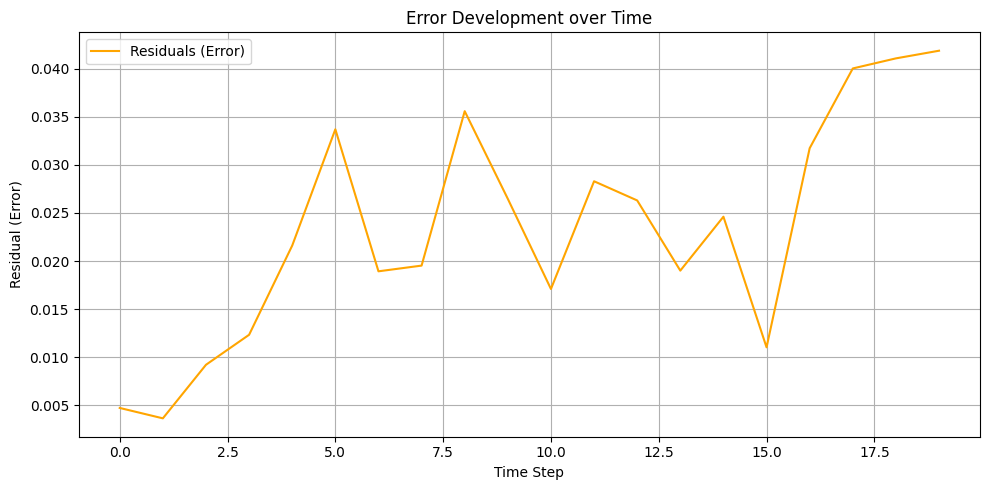

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Registered model 'Direct_LSTM_Model_simple' already exists. Creating a new version of this model...
Created version '5' of model 'Direct_LSTM_Model_simple'.


In [6]:
run_direct_lstm_experiment(
    build_direct_lstm_model_simple,
    'simple',
    'direct_simple',
    X_train_dir,
    y_train_dir,
    X_val_dir,
    y_val_dir,
    X_test_dir,
    y_test_dir,
    20,epochs=100,lstm_units=64)

Direct Average 128 units

Model: "Avarege_Direct_LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 100, 512)       │       528,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 256)            │       656,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,220,244 (4.65 MB)

 Trainable params: 1,220,244 (4.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - loss: 0.0196 - mae: 0.0893 - mse: 0.0196
Epoch 1: val_loss improved from inf to 0.00105, saving model to models/saved/Direct_LSTM_Model_average.keras
517/517 ━━━━━━━━━━━━━━━━━━━━ 157s 294ms/step - loss: 0.0196 - mae: 0.0893 - mse: 0.0196 - val_loss: 0.0011 - val_mae: 0.0254 - val_mse: 0.0011 - learning_rate: 0.0010
Epoch 2/100
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - loss: 0.0026 - mae: 0.0398 - mse: 0.0026
Epoch 2: val_loss improved from 0.00105 to 0.00100, saving model to models/saved/Direct_LSTM_Model_average.keras
517/517 ━━━━━━━━━━━━━━━━━━━━ 145s 280ms/step - loss: 0.0026 - mae: 0.0398 - mse: 0.0026 - val_loss: 0.0010 - val_mae: 0.0250 - val_mse: 0.0010 - learning_rate: 0.0010
Epoch 3/100
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - loss: 0.0017 - mae: 0.0330 - mse: 0.0017
Epoch 3: val_loss improved from 0.00100 to 0.00096, saving model to models/saved/Direct_LSTM_Model_average.keras
517/517 ━━━━━━━━━━━━━━━━━━━━ 153s 296

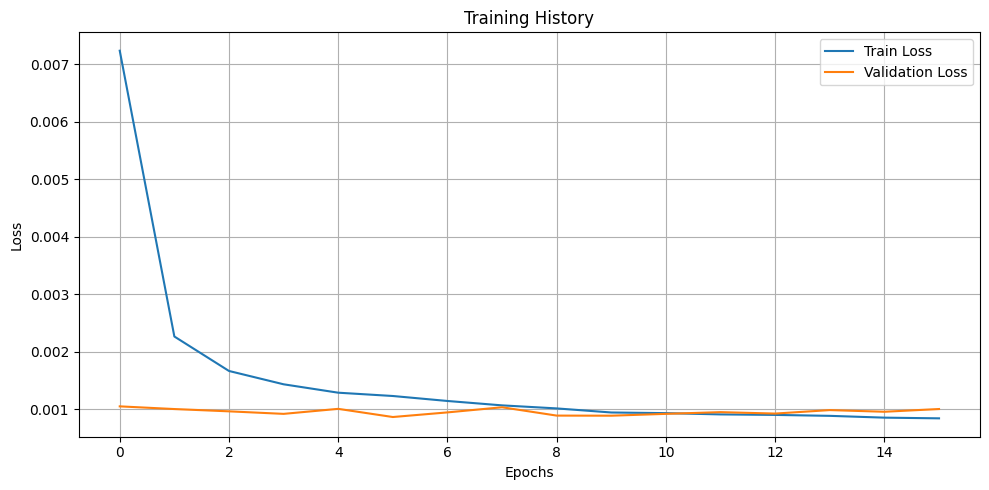

169/169 ━━━━━━━━━━━━━━━━━━━━ 16s 89ms/step
  Metric       Value
0    MSE    0.001224
1    MAE    0.027700
2   RMSE    0.034987
3     R2    0.273971
4   MAPE    5.360052
5  SMAPE    5.330827
6    SAE  149.217689


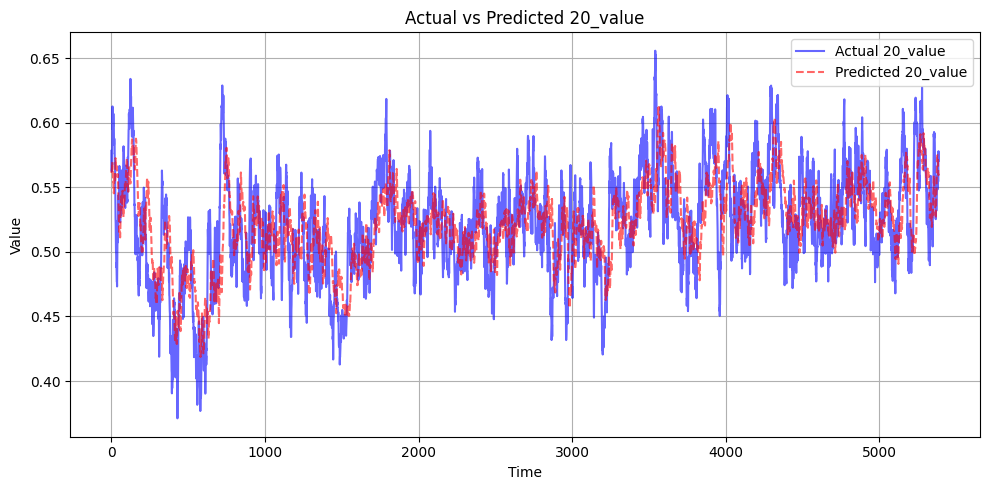

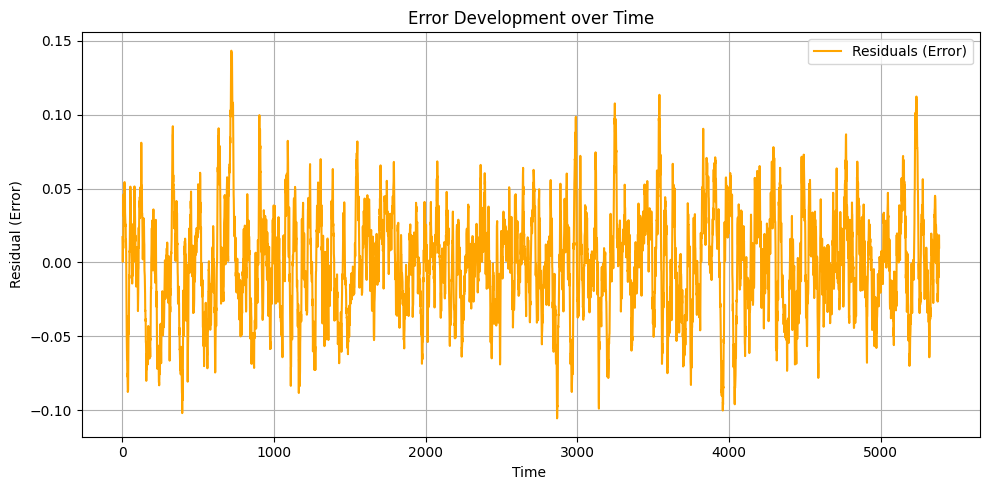

  Metric     Value
0    MSE  0.000144
1    MAE  0.010113
2   RMSE  0.012019
3     R2 -0.704893
4   MAPE  1.767251
5  SMAPE  1.788246
6    SAE  0.202255


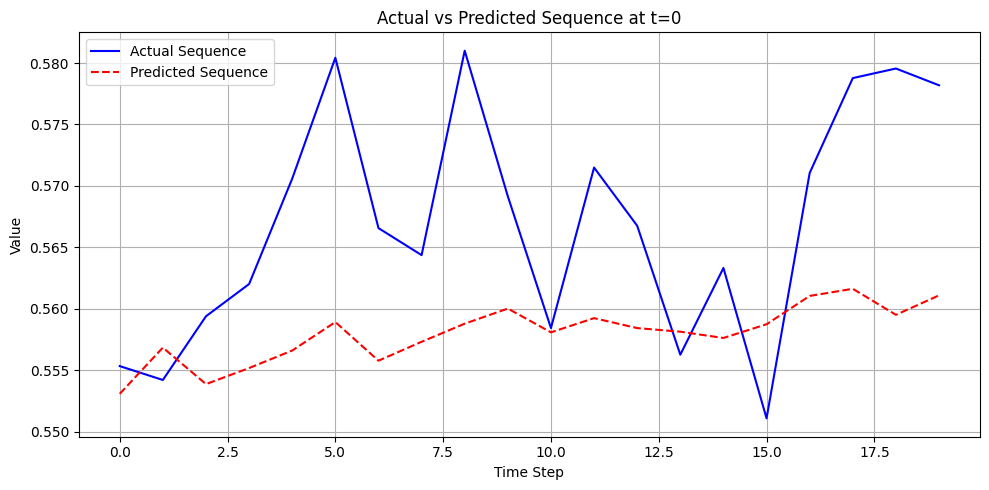

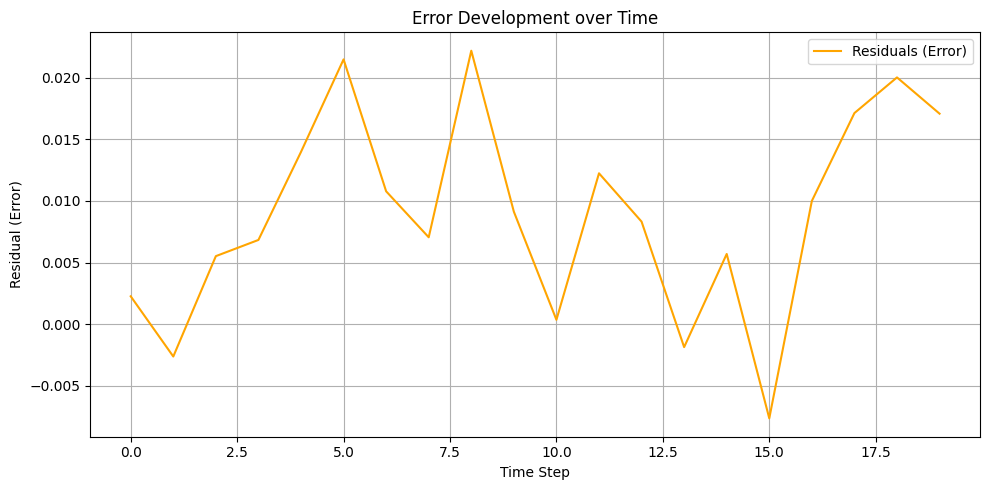

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Registered model 'Direct_LSTM_Model_average' already exists. Creating a new version of this model...
Created version '6' of model 'Direct_LSTM_Model_average'.


In [8]:
run_direct_lstm_experiment(
    build_direct_model_avg,
    'average',
    'direct_average',
    X_train_dir,
    y_train_dir,
    X_val_dir,
    y_val_dir,
    X_test_dir,
    y_test_dir,
    20,epochs=100,lstm_units=128)

Direct Average 64 units

Model: "Avarege_Direct_LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 100, 256)       │       133,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │         1,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 307,028 (1.17 MB)

 Trainable params: 307,028 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.0304 - mae: 0.1142 - mse: 0.0304
Epoch 1: val_loss improved from inf to 0.00126, saving model to models/saved/Direct_LSTM_Model_average.keras
517/517 ━━━━━━━━━━━━━━━━━━━━ 62s 110ms/step - loss: 0.0303 - mae: 0.1141 - mse: 0.0303 - val_loss: 0.0013 - val_mae: 0.0284 - val_mse: 0.0013 - learning_rate: 0.0010
Epoch 2/100
516/517 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0029 - mae: 0.0425 - mse: 0.0029
Epoch 2: val_loss improved from 0.00126 to 0.00104, saving model to models/saved/Direct_LSTM_Model_average.keras
517/517 ━━━━━━━━━━━━━━━━━━━━ 56s 109ms/step - loss: 0.0029 - mae: 0.0425 - mse: 0.0029 - val_loss: 0.0010 - val_mae: 0.0256 - val_mse: 0.0010 - learning_rate: 0.0010
Epoch 3/100
516/517 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.0022 - mae: 0.0368 - mse: 0.0022
Epoch 3: val_loss did not improve from 0.00104
517/517 ━━━━━━━━━━━━━━━━━━━━ 59s 114ms/step - loss: 0.0022 - mae: 0.0368 - mse: 0.0022 - val_loss: 0.0012 -

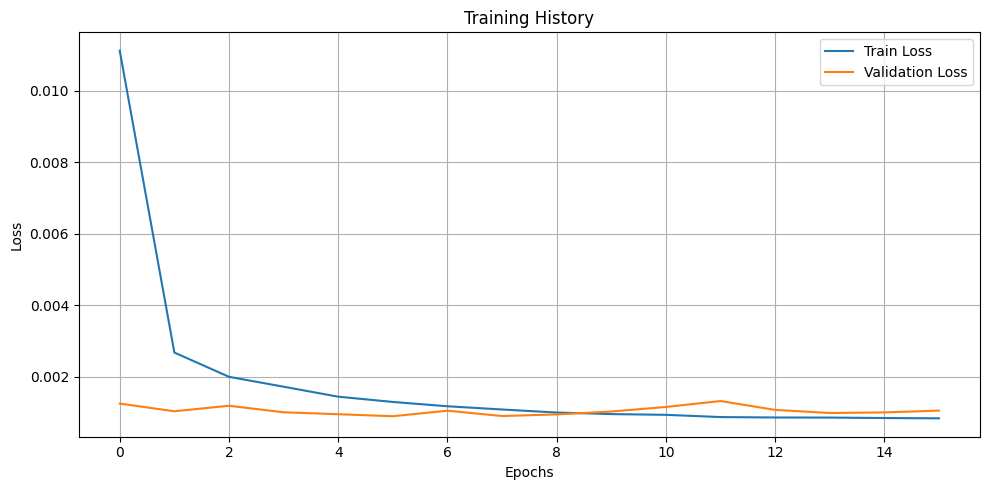

169/169 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step
  Metric       Value
0    MSE    0.001281
1    MAE    0.028510
2   RMSE    0.035786
3     R2    0.240445
4   MAPE    5.453953
5  SMAPE    5.502906
6    SAE  153.583266


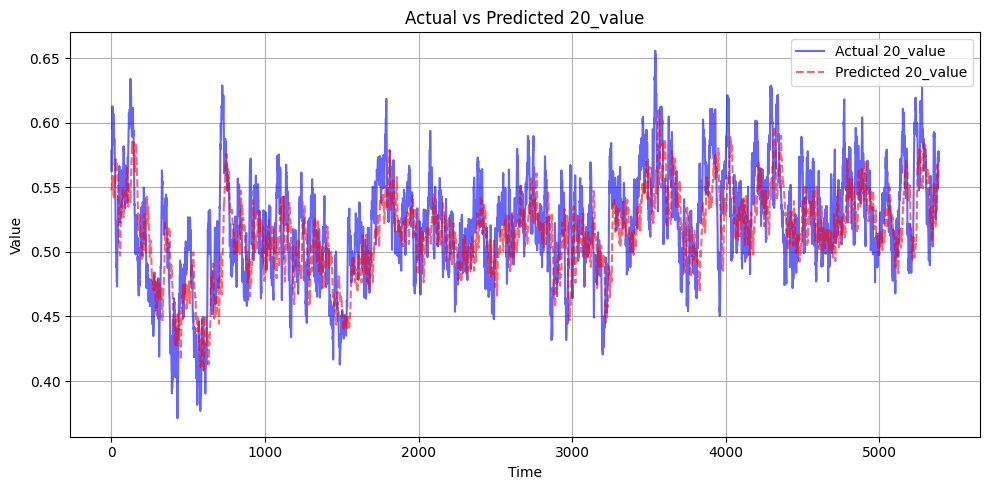

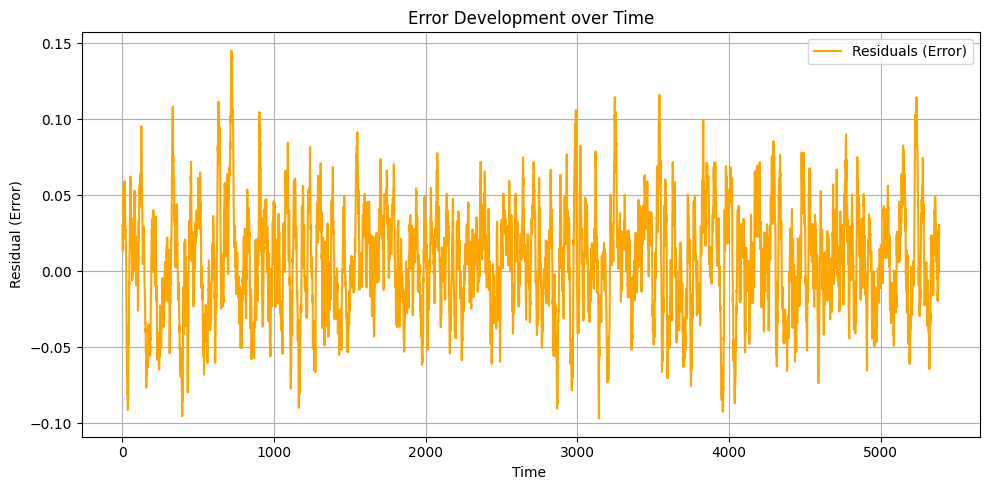

  Metric     Value
0    MSE  0.000491
1    MAE  0.020163
2   RMSE  0.022152
3     R2 -4.791197
4   MAPE  3.531630
5  SMAPE  3.607988
6    SAE  0.403259


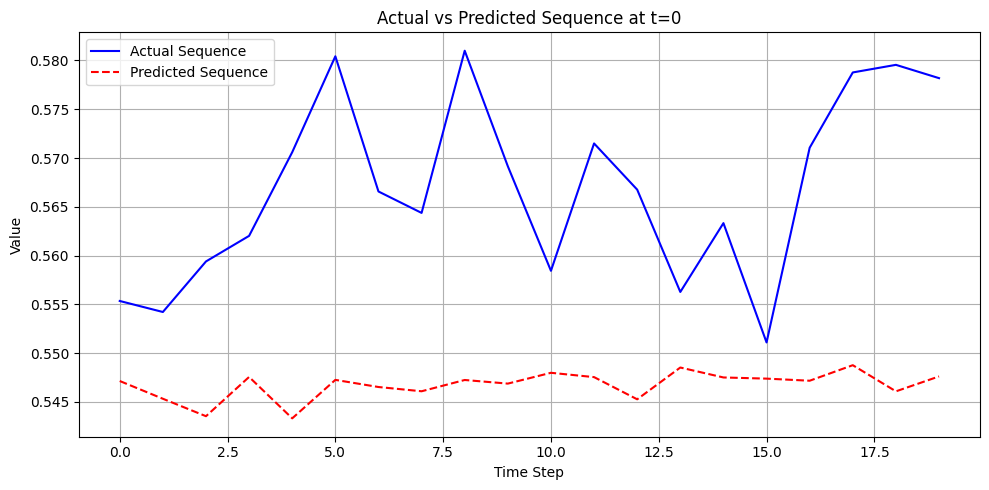

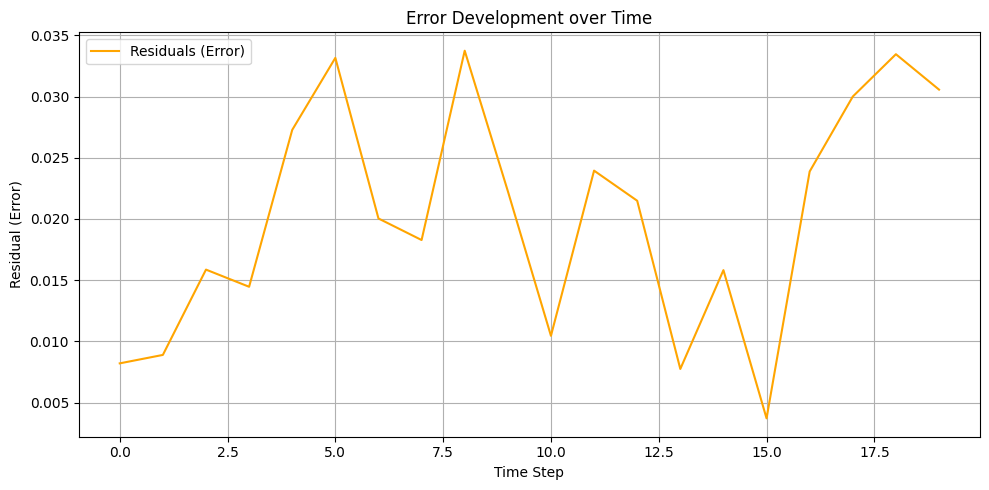

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Registered model 'Direct_LSTM_Model_average' already exists. Creating a new version of this model...
Created version '7' of model 'Direct_LSTM_Model_average'.


In [9]:

run_direct_lstm_experiment(
    build_direct_model_avg,
    'average',
    'direct_average',
    X_train_dir,
    y_train_dir,
    X_val_dir,
    y_val_dir,
    X_test_dir,
    y_test_dir,
    20,epochs=100,lstm_units=64)

Direct Average 32 units

Model: "Avarege_Direct_LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 100, 128)       │        33,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 20)             │           660 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,748 (303.70 KB)

 Trainable params: 77,748 (303.70 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.0465 - mae: 0.1483 - mse: 0.0465
Epoch 1: val_loss improved from inf to 0.00249, saving model to models/saved/Direct_LSTM_Model_average.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 69s 123ms/step - loss: 0.0465 - mae: 0.1482 - mse: 0.0465 - val_loss: 0.0025 - val_mae: 0.0422 - val_mse: 0.0025 - learning_rate: 0.0010
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.0038 - mae: 0.0482 - mse: 0.0038
Epoch 2: val_loss improved from 0.00249 to 0.00146, saving model to models/saved/Direct_LSTM_Model_average.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 62s 119ms/step - loss: 0.0038 - mae: 0.0482 - mse: 0.0038 - val_loss: 0.0015 - val_mae: 0.0309 - val_mse: 0.0015 - learning_rate: 0.0010
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.0027 - mae: 0.0411 - mse: 0.0027
Epoch 3: val_loss did not improve from 0.00146
516/516 ━━━━━━━━━━━━━━━━━━━━ 61s 118ms/step - loss: 0.0027 - mae: 0.0411 - mse: 0.0027 - val_loss: 0.0026

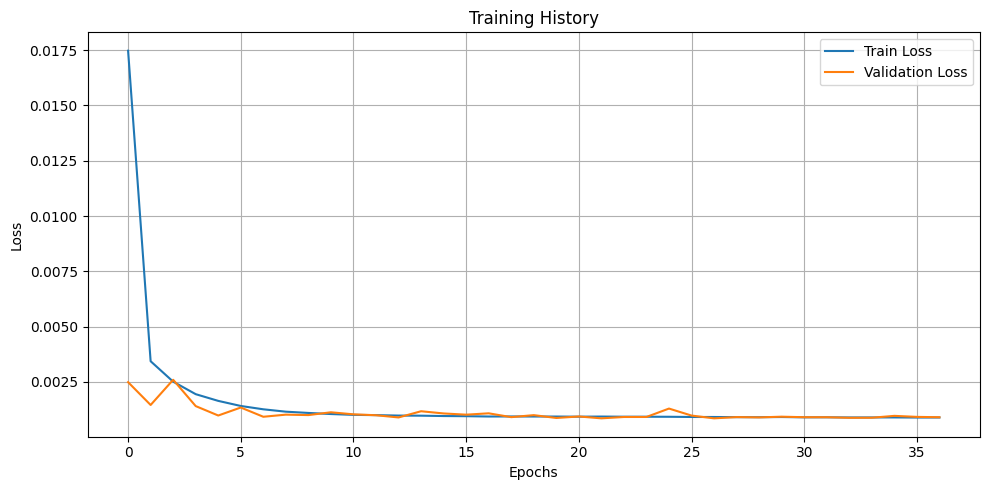

169/169 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step
  Metric       Value
0    MSE    0.000926
1    MAE    0.023720
2   RMSE    0.030428
3     R2    0.630699
4   MAPE    4.280387
5  SMAPE    4.245939
6    SAE  127.733871


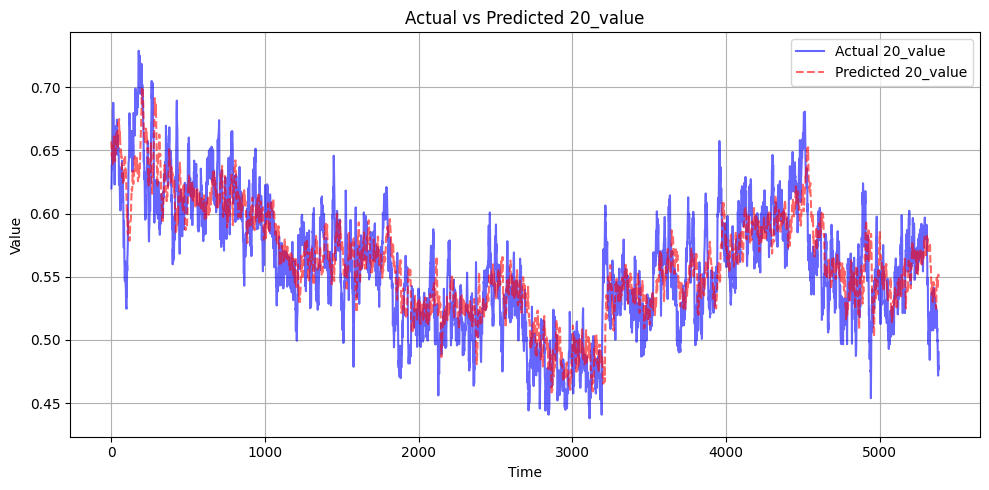

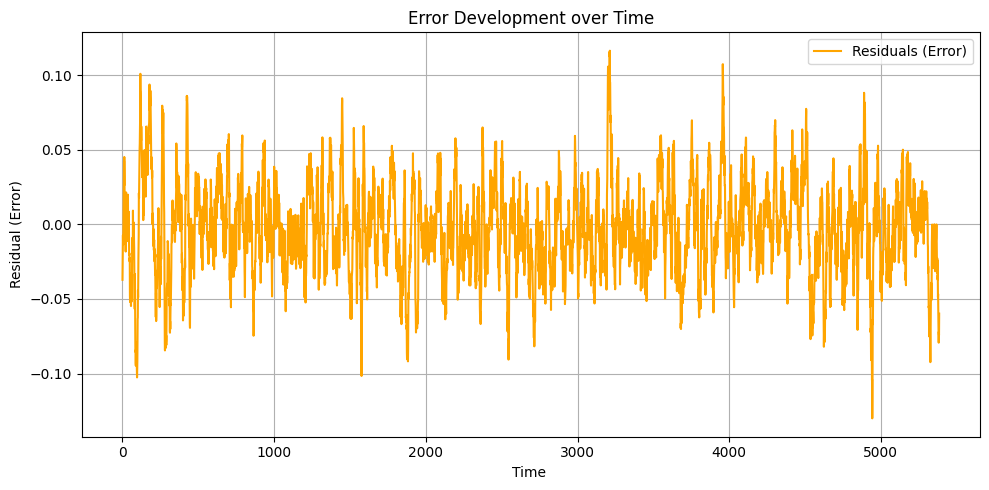

  Metric     Value
0    MSE  0.001430
1    MAE  0.035124
2   RMSE  0.037815
3     R2 -6.860410
4   MAPE  5.694740
5  SMAPE  5.510978
6    SAE  0.702487


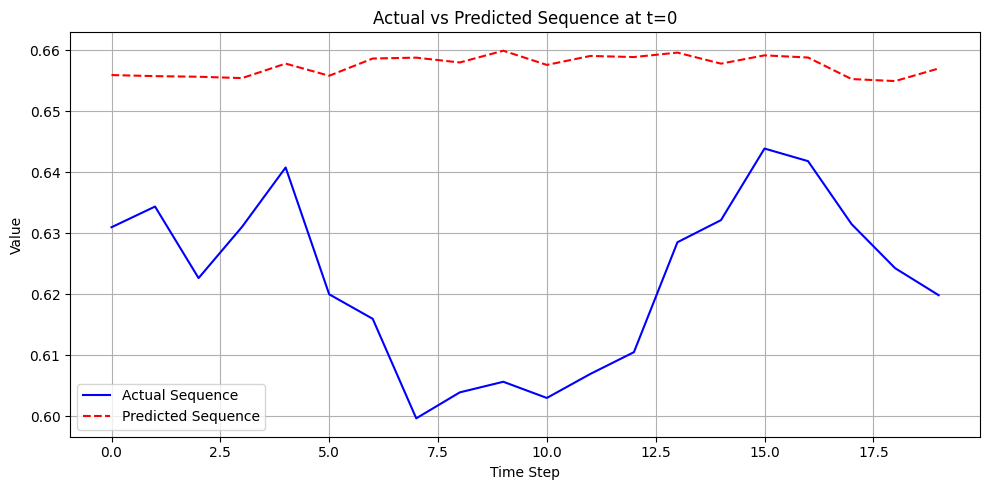

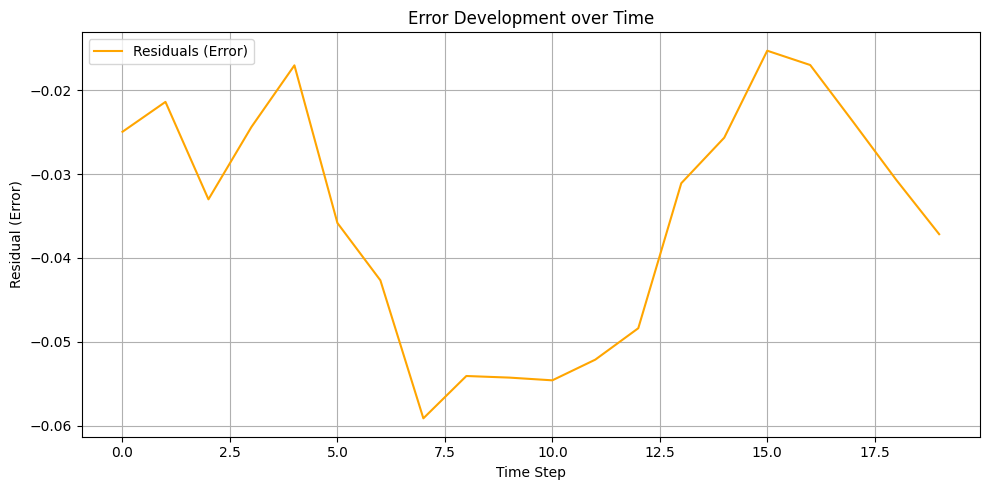

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Registered model 'Direct_LSTM_Model_average' already exists. Creating a new version of this model...
Created version '4' of model 'Direct_LSTM_Model_average'.


In [ ]:
run_direct_lstm_experiment(
    build_direct_model_avg,
    'average',
    'direct_average',
    X_train_dir,
    y_train_dir,
    X_val_dir,
    y_val_dir,
    X_test_dir,
    y_test_dir,
    20,epochs=100,lstm_units=32)

Direct Advanced

Model: "Advanced_Direct_LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidir_lstm_1 (Bidirectional)    │ (None, 100, 128)       │        33,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_1                    │ (None, 100, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_2                    │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 20)             │           660 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,892 (233.95 KB)

 Trainable params: 59,572 (232.70 KB)

 Non-trainable params: 320 (1.25 KB)

Epoch 1/100
516/517 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1190 - mae: 0.2283 - mse: 0.1190
Epoch 1: val_loss improved from inf to 0.00225, saving model to models/saved/Direct_LSTM_Model_advanced.keras
517/517 ━━━━━━━━━━━━━━━━━━━━ 38s 63ms/step - loss: 0.1187 - mae: 0.2279 - mse: 0.1187 - val_loss: 0.0023 - val_mae: 0.0374 - val_mse: 0.0023 - learning_rate: 0.0010
Epoch 2/100
516/517 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0039 - mae: 0.0490 - mse: 0.0039
Epoch 2: val_loss did not improve from 0.00225
517/517 ━━━━━━━━━━━━━━━━━━━━ 33s 64ms/step - loss: 0.0039 - mae: 0.0490 - mse: 0.0039 - val_loss: 0.0033 - val_mae: 0.0491 - val_mse: 0.0033 - learning_rate: 0.0010
Epoch 3/100
516/517 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0025 - mae: 0.0392 - mse: 0.0025
Epoch 3: val_loss did not improve from 0.00225
517/517 ━━━━━━━━━━━━━━━━━━━━ 32s 62ms/step - loss: 0.0025 - mae: 0.0392 - mse: 0.0025 - val_loss: 0.0025 - val_mae: 0.0416 - val_mse: 0.0025 - learning_rate: 0.0010
Epoch 4/10

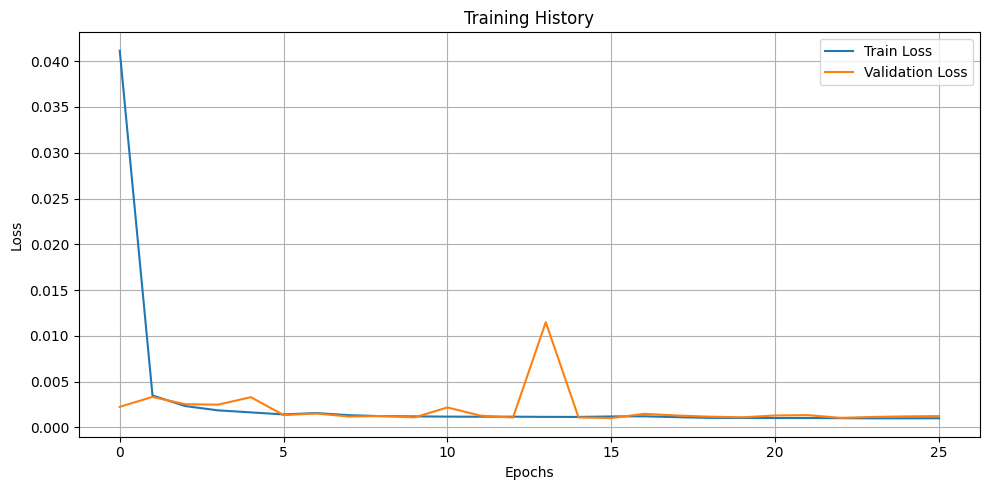

169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step
  Metric       Value
0    MSE    0.001274
1    MAE    0.028266
2   RMSE    0.035700
3     R2    0.244092
4   MAPE    5.437593
5  SMAPE    5.455335
6    SAE  152.266858


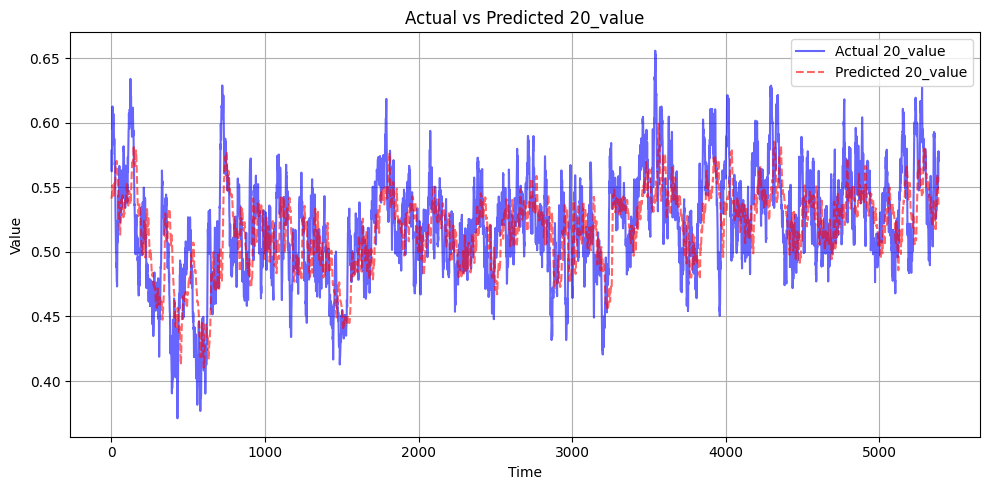

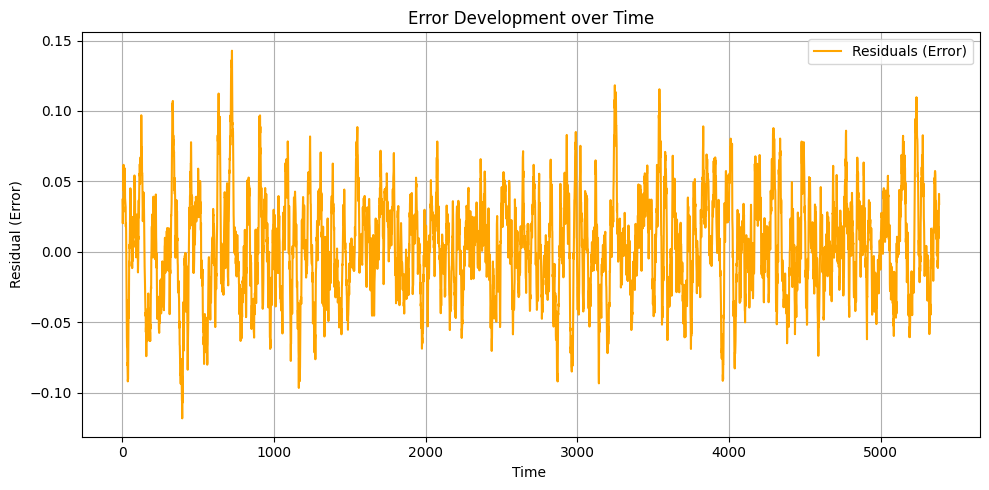

  Metric     Value
0    MSE  0.000785
1    MAE  0.026631
2   RMSE  0.028015
3     R2 -8.262618
4   MAPE  4.674143
5  SMAPE  4.797406
6    SAE  0.532628


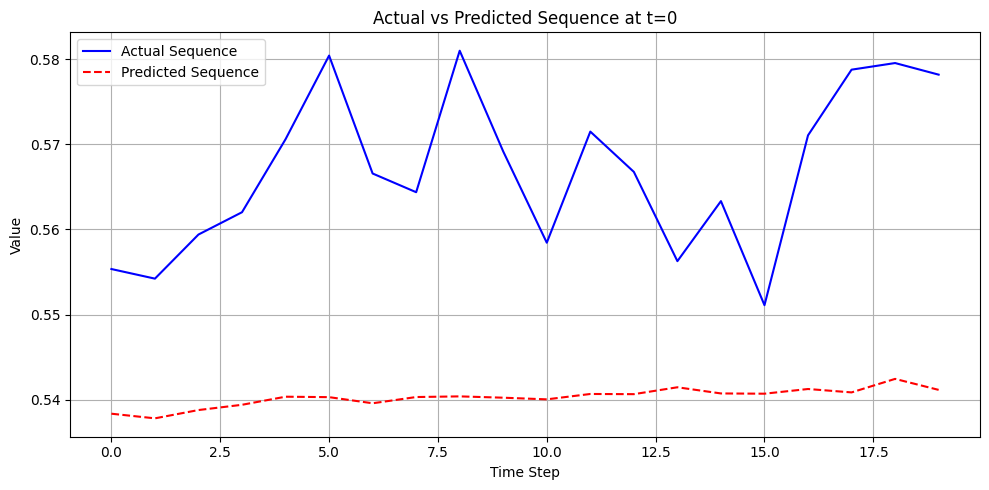

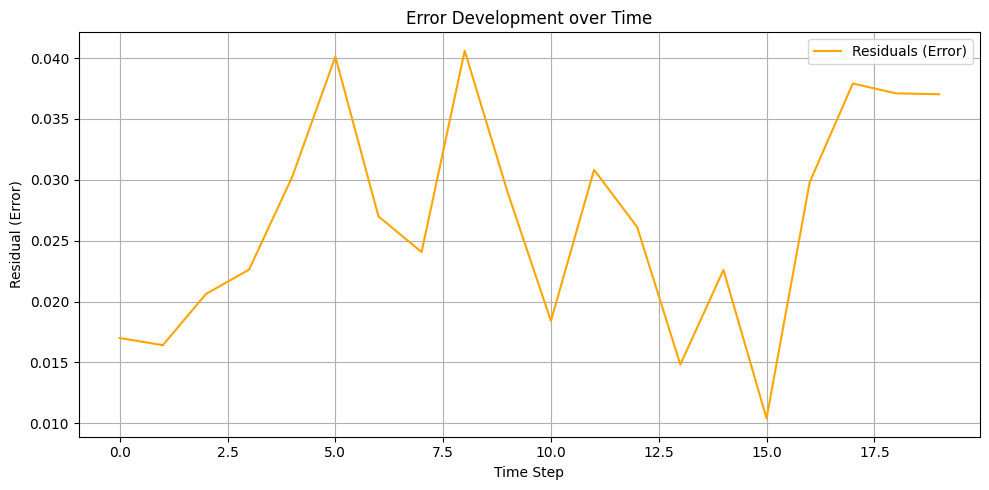

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Registered model 'Direct_LSTM_Model_advanced' already exists. Creating a new version of this model...
Created version '4' of model 'Direct_LSTM_Model_advanced'.


In [10]:
run_direct_lstm_experiment(
    build_advanced_direct_lstm,
    'advanced',
    'direct_advanced',
    X_train_dir,
    y_train_dir,
    X_val_dir,
    y_val_dir,
    X_test_dir,
    y_test_dir,
    20,epochs=100,lstm_units=64)

Recursive Model

In [11]:
from autoregression.models.RecurLSTM import build_recursive_lstm_simple


Recursive Simple

Model: "Recursive_LSTM_Model_simple"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_layer (LSTM)               │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0223 - mae: 0.0677 - mse: 0.0223
Epoch 1: val_loss improved from inf to 0.00041, saving model to models/saved/Recursive_LSTM_Model_simple.keras
517/517 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - loss: 0.0223 - mae: 0.0676 - mse: 0.0223 - val_loss: 4.0789e-04 - val_mae: 0.0162 - val_mse: 4.0789e-04 - learning_rate: 0.0010
Epoch 2/100
515/517 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.7218e-04 - mae: 0.0153 - mse: 3.7218e-04
Epoch 2: val_loss improved from 0.00041 to 0.00030, saving model to models/saved/Recursive_LSTM_Model_simple.keras
517/517 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 3.7195e-04 - mae: 0.0153 - mse: 3.7195e-04 - val_loss: 2.9547e-04 - val_mae: 0.0138 - val_mse: 2.9547e-04 - learning_rate: 0.0010
Epoch 3/100
515/517 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.7518e-04 - mae: 0.0132 - mse: 2.7518e-04
Epoch 3: val_loss improved from 0.00030 to 0.00024, saving model to models/saved/Recursive_LSTM_Model_simple.kera

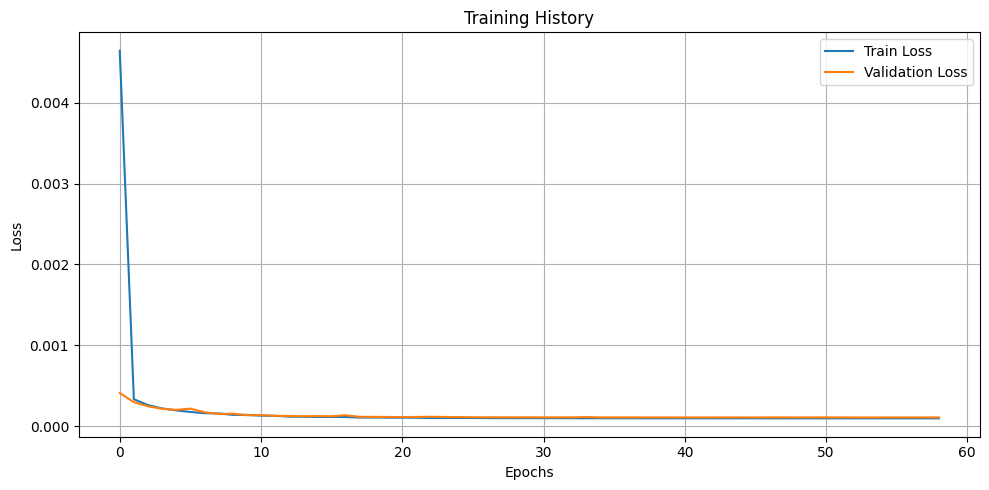

  Metric       Value
0    MSE    0.001243
1    MAE    0.027941
2   RMSE    0.035250
3     R2    0.257703
4   MAPE    5.413987
5  SMAPE    5.404641
6    SAE  139.702630


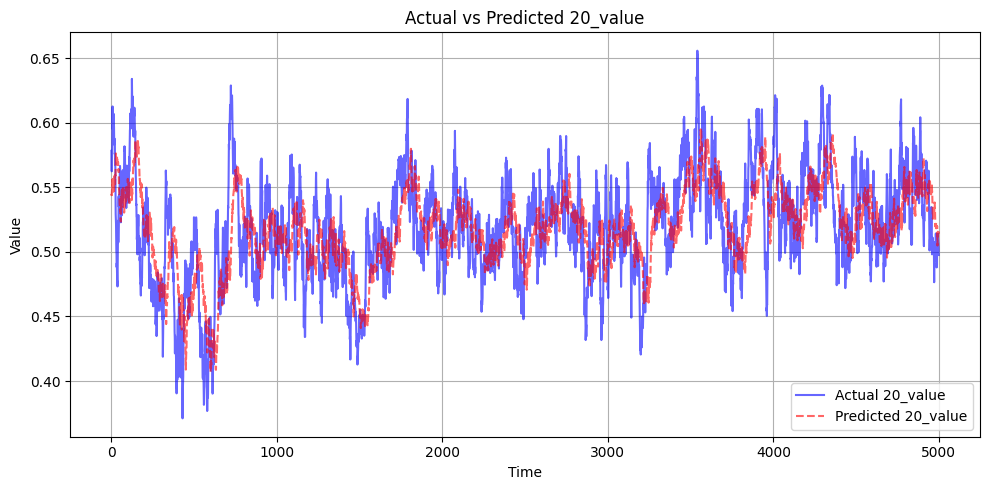

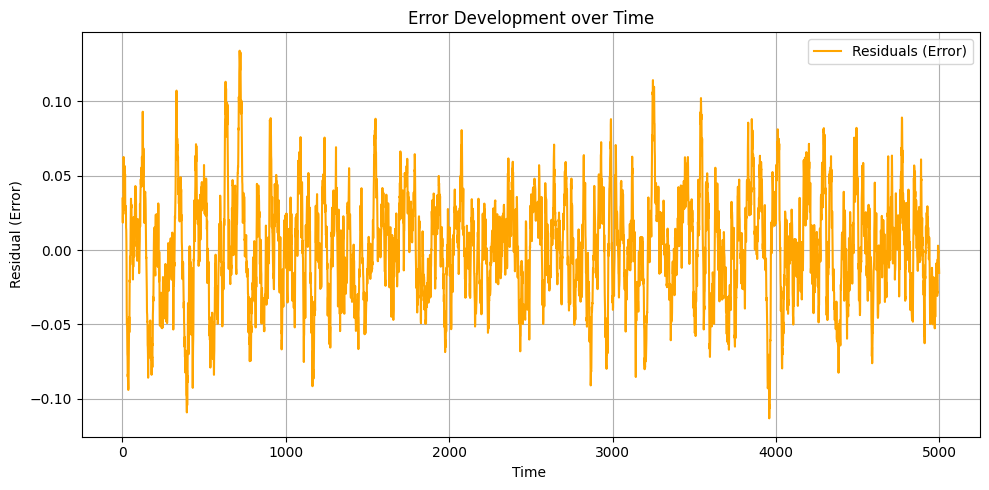

  Metric     Value
0    MSE  0.000485
1    MAE  0.019264
2   RMSE  0.022012
3     R2 -4.718252
4   MAPE  3.369496
5  SMAPE  3.444757
6    SAE  0.385276


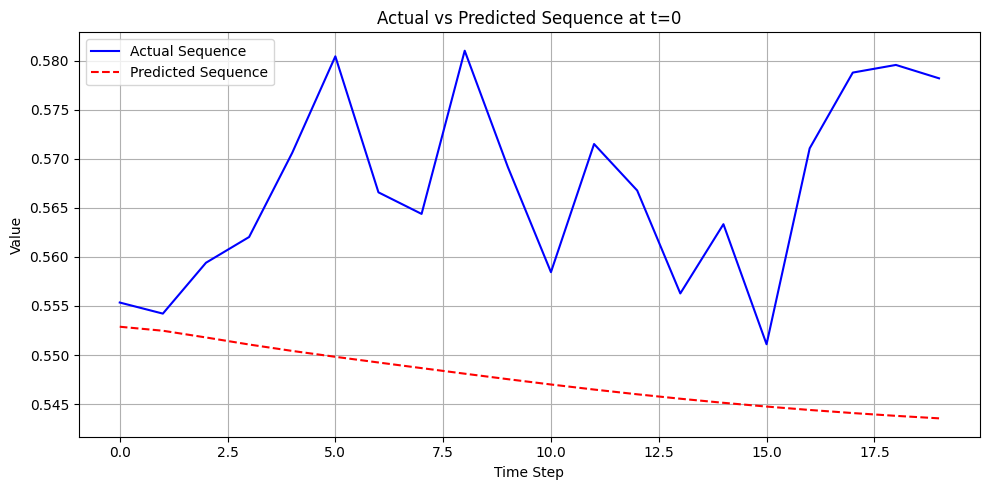

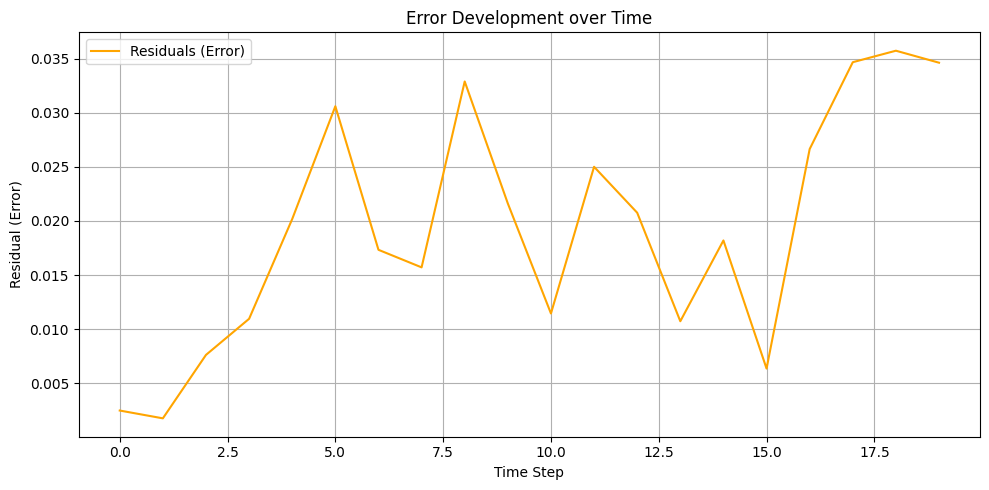

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Registered model 'Recursive_LSTM_Model_simple' already exists. Creating a new version of this model...
Created version '2' of model 'Recursive_LSTM_Model_simple'.


In [12]:
run_recursive_lstm_experiment(
    build_recursive_lstm_simple,
    'simple',
    'recursive_simple',
    X_train_rec,
    y_train_rec,
    X_val_rec,
    y_val_rec,
    X_test_rec,
    y_test_dir,
    n_predicted_rows=5000,
    output_steps=20,
    epochs=100)

Sequence to sequence model

In [13]:
from autoregression.utils_ar import run_seq2seq_lstm_experiment
from autoregression.models.seq2seq_lstm import build_seq2seq_lstm_simple

Seq2Seq Simple

Model: "Seq2Seq_LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 100, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_lstm (LSTM)             │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 20, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_lstm (LSTM)             │ (None, 20, 32)         │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_output         │ (None, 20, 1)          │            33 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,705 (49.63 KB)

 Trainable params: 12,705 (49.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
515/517 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0313 - mae: 0.1024 - mse: 0.0313
Epoch 1: val_loss improved from inf to 0.00211, saving model to models/saved/Seq2seq_LSTM_Model_simple.keras
517/517 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - loss: 0.0312 - mae: 0.1021 - mse: 0.0312 - val_loss: 0.0021 - val_mae: 0.0372 - val_mse: 0.0021 - learning_rate: 0.0010
Epoch 2/30
515/517 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0011 - mae: 0.0259 - mse: 0.0011
Epoch 2: val_loss improved from 0.00211 to 0.00113, saving model to models/saved/Seq2seq_LSTM_Model_simple.keras
517/517 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - loss: 0.0011 - mae: 0.0259 - mse: 0.0011 - val_loss: 0.0011 - val_mae: 0.0268 - val_mse: 0.0011 - learning_rate: 0.0010
Epoch 3/30
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0011 - mae: 0.0255 - mse: 0.0011
Epoch 3: val_loss improved from 0.00113 to 0.00112, saving model to models/saved/Seq2seq_LSTM_Model_simple.keras
517/517 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - lo

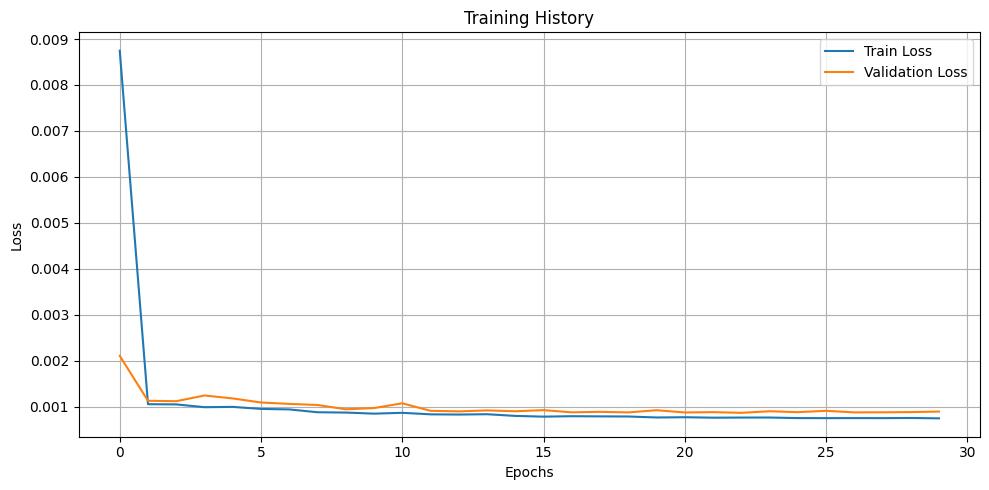

169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
  Metric       Value
0    MSE    0.001281
1    MAE    0.028396
2   RMSE    0.035788
3     R2    0.240361
4   MAPE    5.439545
5  SMAPE    5.473669
6    SAE  152.969791


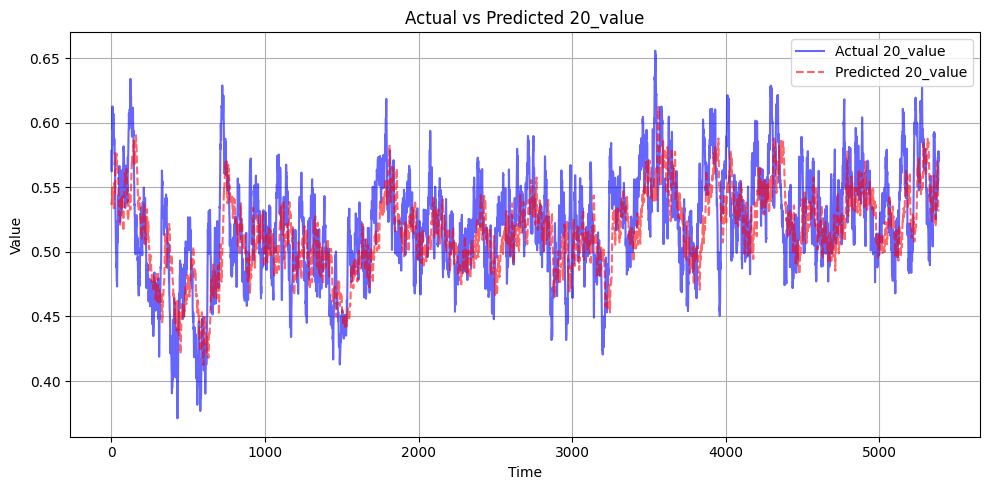

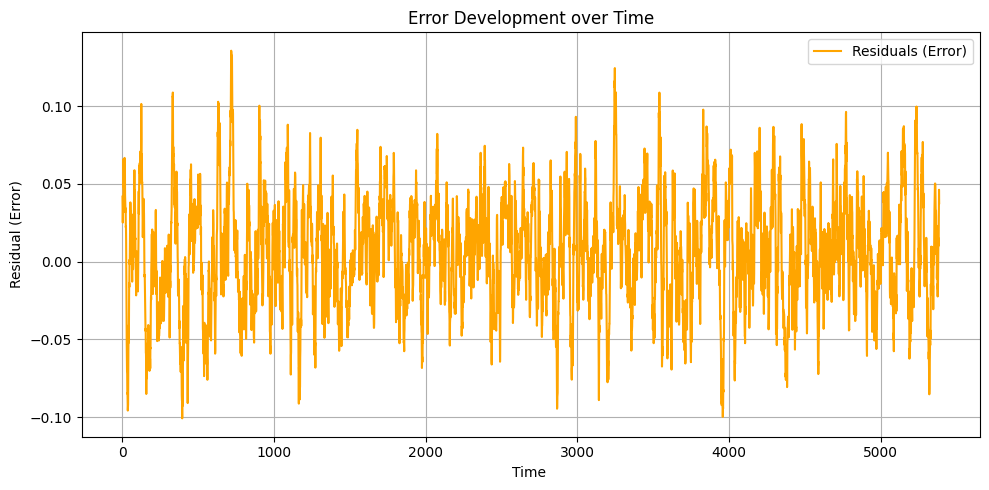

  Metric     Value
0    MSE  0.000742
1    MAE  0.024732
2   RMSE  0.027235
3     R2 -7.753836
4   MAPE  4.333463
5  SMAPE  4.449644
6    SAE  0.494634


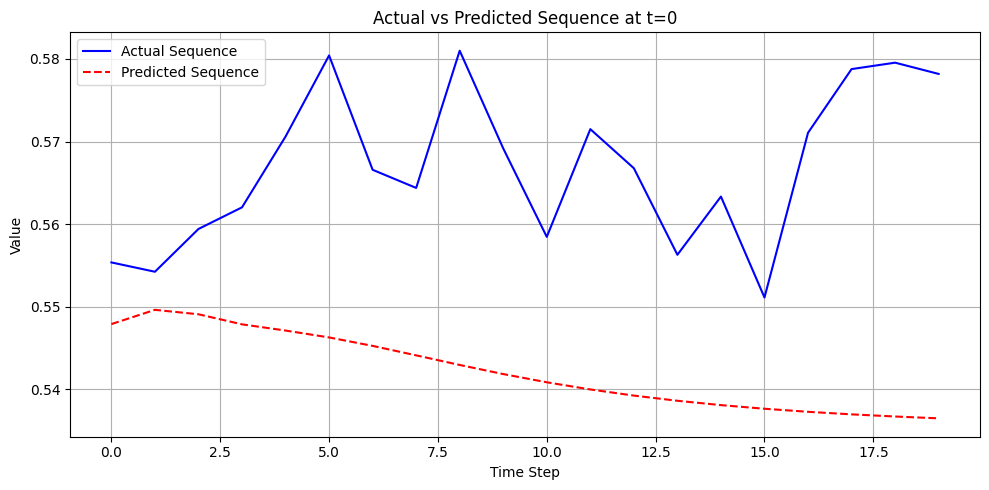

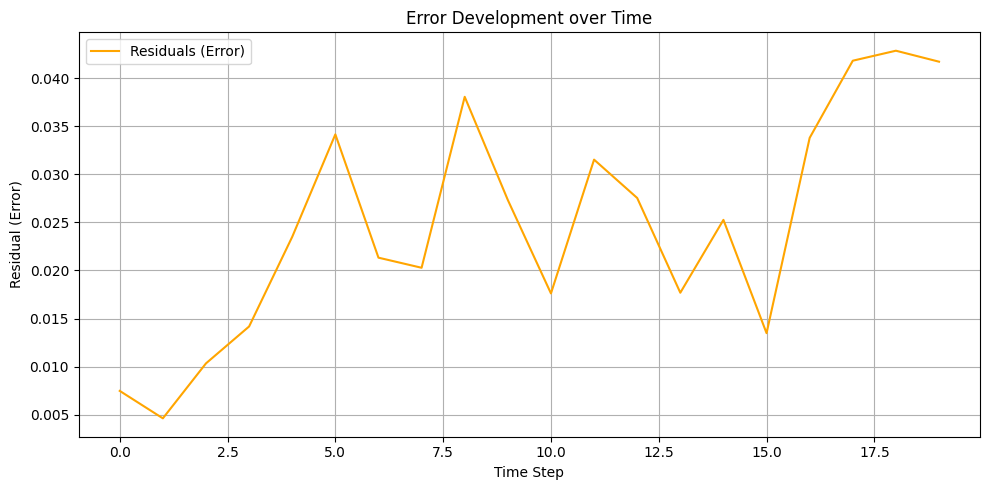

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Registered model 'Seq2seq_LSTM_Model_simple' already exists. Creating a new version of this model...
Created version '4' of model 'Seq2seq_LSTM_Model_simple'.


In [14]:

run_seq2seq_lstm_experiment(build_seq2seq_lstm_simple,
                            'simple',
                            'seq2seq_simple',
                            X_train=X_train_dir,
                            X_test=X_test_dir,
                            X_val=X_val_dir,
                            y_test=y_test_dir,
                            y_train=y_train_dir,
                            y_val=y_val_dir,
                            output_steps=20,
                            lstm_units=32)

Hybrid Model

In [5]:
from autoregression.utils_ar import run_direct_refiner_experiment
from autoregression.models.RefineLSTM import build_refinement_cnn_model_simple,build_refinement_lstm_model_simple,build_average_refinement_lstm
import mlflow.keras

Hybrid: Direct Simple + Refine LSTM Simple 

517/517 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step
(20, 1)


Model: "Refinement_LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ refinement_input (InputLayer)   │ (None, 20, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ refinement_lstm (LSTM)          │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ refined_20th_output (Dense)     │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
510/517 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0240 - mae: 0.0774 - mse: 0.0240
Epoch 1: val_loss improved from inf to 0.00156, saving model to models/saved/Direct_Refiner_Model_simple_lstm_simple.keras
517/517 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0237 - mae: 0.0768 - mse: 0.0237 - val_loss: 0.0016 - val_mae: 0.0313 - val_mse: 0.0016 - learning_rate: 0.0010
Epoch 2/30
515/517 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - mae: 0.0272 - mse: 0.0012
Epoch 2: val_loss improved from 0.00156 to 0.00144, saving model to models/saved/Direct_Refiner_Model_simple_lstm_simple.keras
517/517 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0012 - mae: 0.0272 - mse: 0.0012 - val_loss: 0.0014 - val_mae: 0.0301 - val_mse: 0.0014 - learning_rate: 0.0010
Epoch 3/30
515/517 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0269 - mse: 0.0012
Epoch 3: val_loss improved from 0.00144 to 0.00137, saving model to models/saved/Direct_Refiner_Model_simple_lstm_simple.keras
517/517 ━━━━

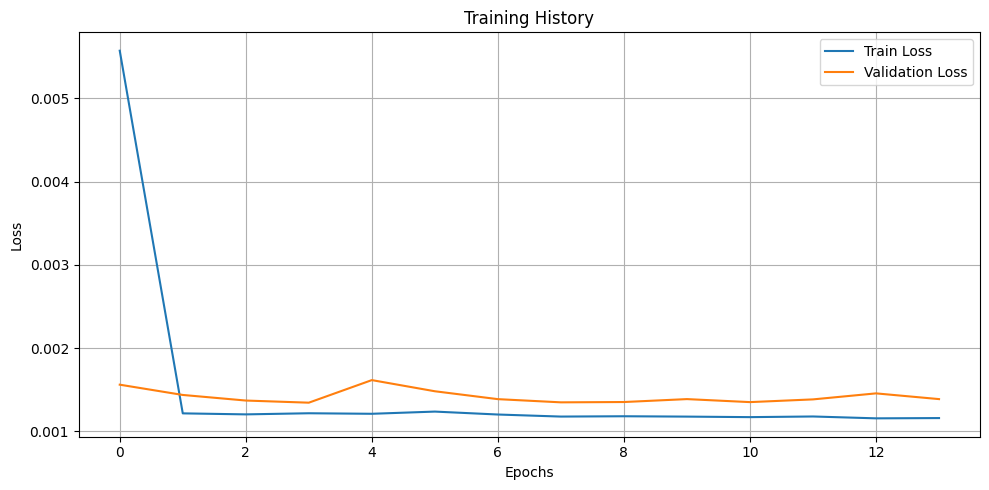

169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
  Metric       Value
0    MSE    0.001218
1    MAE    0.027667
2   RMSE    0.034902
3     R2    0.277518
4   MAPE    5.310035
5  SMAPE    5.332502
6    SAE  149.040108


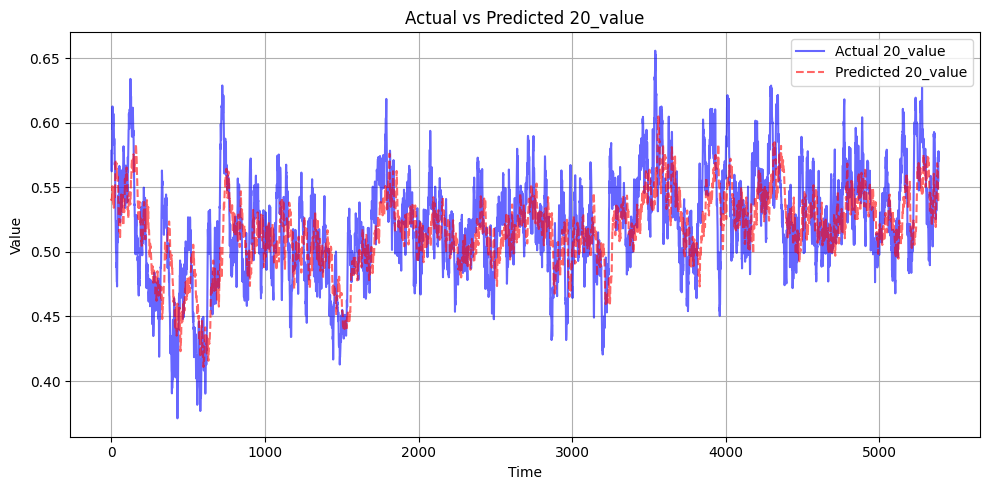

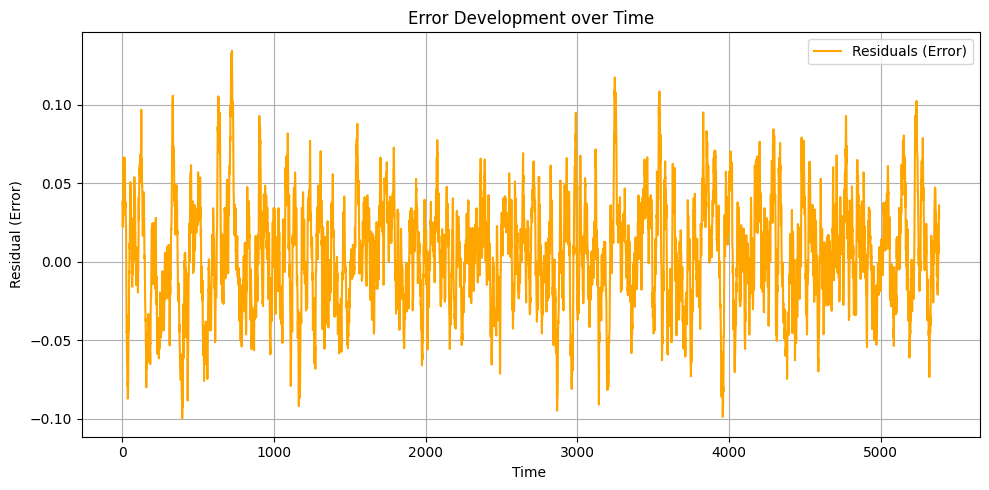

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Registered model 'Direct_Refiner_Model_simple_lstm_simple' already exists. Creating a new version of this model...
Created version '4' of model 'Direct_Refiner_Model_simple_lstm_simple'.


In [21]:

dir_model = mlflow.keras.load_model("models:/Direct_LSTM_Model_simple/7") 
run_direct_refiner_experiment(build_refinement_lstm_model_simple,
                              dir_model,
                              'simple_lstm_simple',
                              'ref_simple_lstm_simple',
                              X_train_dir=X_train_dir,
                              X_test_dir=X_test_dir,
                              X_val_dir=X_val_dir,
                              y_test_dir=y_test_dir,
                              y_train_dir=y_train_dir,
                              y_val_dir=y_val_dir,
                              output_steps=20,
                              units=64)

Hybrid: Direct Simple + Refine CNN Simple 

517/517 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step
(20, 1)


Model: "Base_CNN_Refiner"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ refinement_input (InputLayer)   │ (None, 20, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 18, 16)         │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ (None, 16)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ refined_output (Dense)          │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
493/517 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0594 - mae: 0.1573
Epoch 1: val_loss improved from inf to 0.00287, saving model to models/saved/Direct_Refiner_Model_simple_cnn_simple.keras
517/517 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0574 - mae: 0.1529 - val_loss: 0.0029 - val_mae: 0.0440 - learning_rate: 0.0010
Epoch 2/30
482/517 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015 - mae: 0.0305
Epoch 2: val_loss improved from 0.00287 to 0.00253, saving model to models/saved/Direct_Refiner_Model_simple_cnn_simple.keras
517/517 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0015 - mae: 0.0304 - val_loss: 0.0025 - val_mae: 0.0409 - learning_rate: 0.0010
Epoch 3/30
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0013 - mae: 0.0289
Epoch 3: val_loss improved from 0.00253 to 0.00183, saving model to models/saved/Direct_Refiner_Model_simple_cnn_simple.keras
517/517 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0013 - mae: 0.0289 - val_loss: 0.0018 - val_mae: 0.0340 - learning_rat

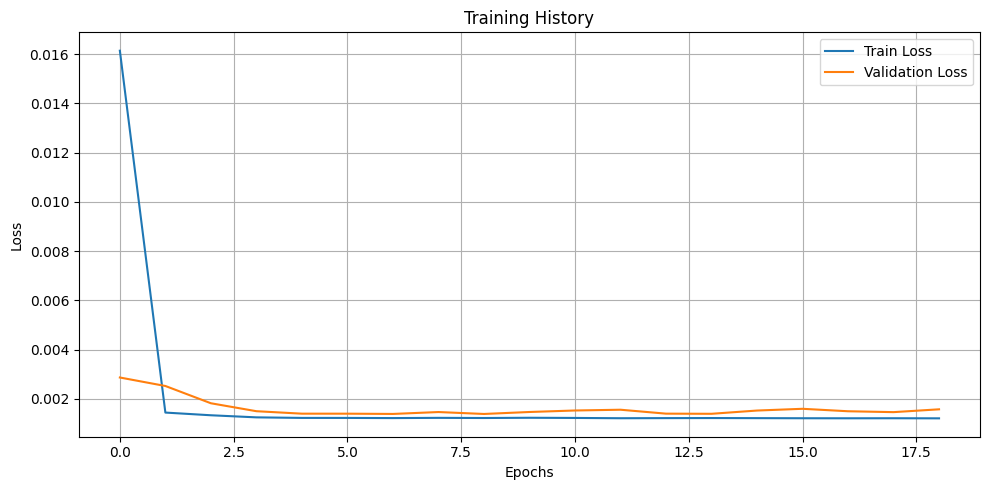

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step
  Metric       Value
0    MSE    0.001267
1    MAE    0.028260
2   RMSE    0.035598
3     R2    0.248402
4   MAPE    5.413029
5  SMAPE    5.444691
6    SAE  152.234929


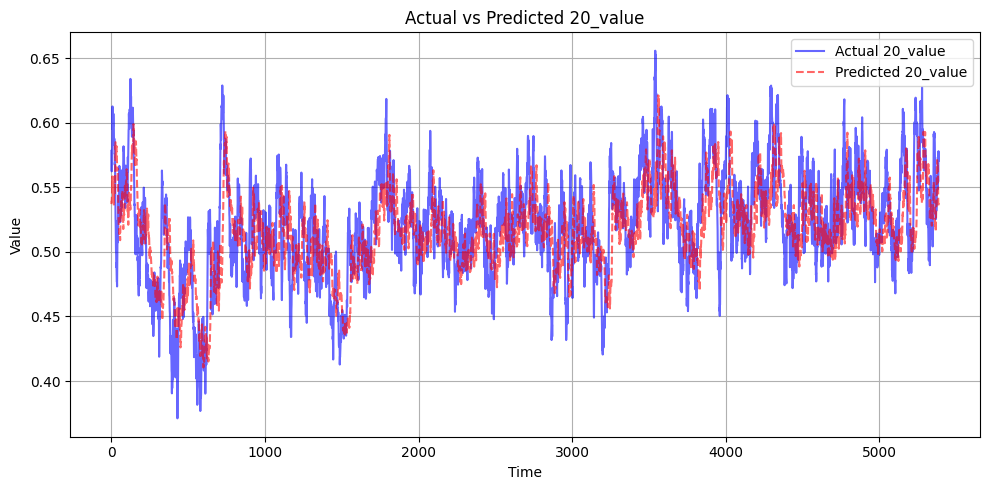

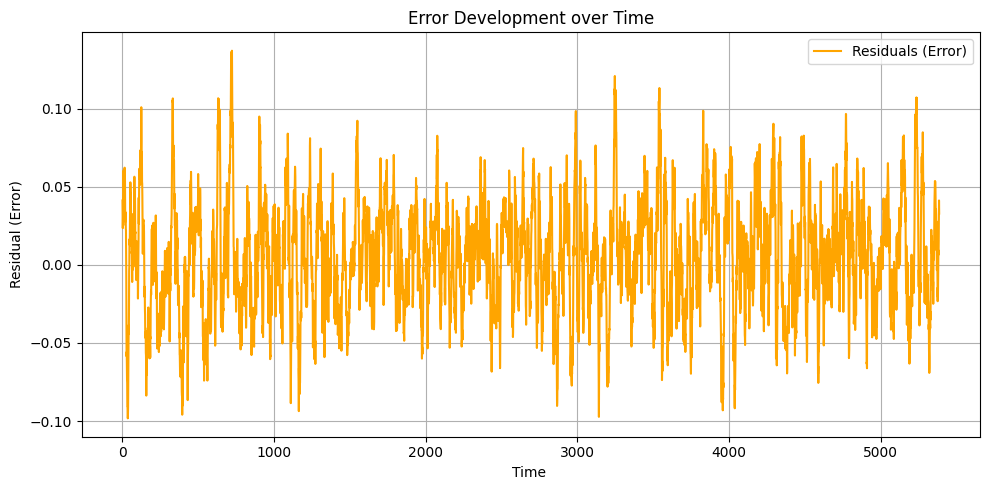

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Registered model 'Direct_Refiner_Model_simple_cnn_simple' already exists. Creating a new version of this model...
Created version '5' of model 'Direct_Refiner_Model_simple_cnn_simple'.


In [22]:
dir_model = mlflow.keras.load_model("models:/Direct_LSTM_Model_simple/7") 
run_direct_refiner_experiment(build_refinement_cnn_model_simple,
                              dir_model,
                              'simple_cnn_simple',
                              'ref_simple_cnn_simple',
                              X_train_dir=X_train_dir,
                              X_test_dir=X_test_dir,
                              X_val_dir=X_val_dir,
                              y_test_dir=y_test_dir,
                              y_train_dir=y_train_dir,
                              y_val_dir=y_val_dir,
                              output_steps=20,
                              units=32)

Hybrid: Direct Simple + Refine LSTM Average

517/517 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step
(20, 1)


Model: "Refiner_LSTM_Average"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ refinement_input (InputLayer)   │ (None, 20, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 20, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 20, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 20, 32)         │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 20, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,465 (126.82 KB)

 Trainable params: 32,465 (126.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
516/517 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0288 - mae: 0.1125 - mse: 0.0288
Epoch 1: val_loss improved from inf to 0.00150, saving model to models/saved/Direct_Refiner_Model_simple_lstm_avg.keras
517/517 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - loss: 0.0287 - mae: 0.1124 - mse: 0.0287 - val_loss: 0.0015 - val_mae: 0.0310 - val_mse: 0.0015 - learning_rate: 0.0010
Epoch 2/30
515/517 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0055 - mae: 0.0584 - mse: 0.0055
Epoch 2: val_loss did not improve from 0.00150
517/517 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.0055 - mae: 0.0584 - mse: 0.0055 - val_loss: 0.0016 - val_mae: 0.0321 - val_mse: 0.0016 - learning_rate: 0.0010
Epoch 3/30
516/517 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0037 - mae: 0.0484 - mse: 0.0037
Epoch 3: val_loss improved from 0.00150 to 0.00135, saving model to models/saved/Direct_Refiner_Model_simple_lstm_avg.keras
517/517 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0037 - mae: 0.0484 - mse: 0.0037 - val_l

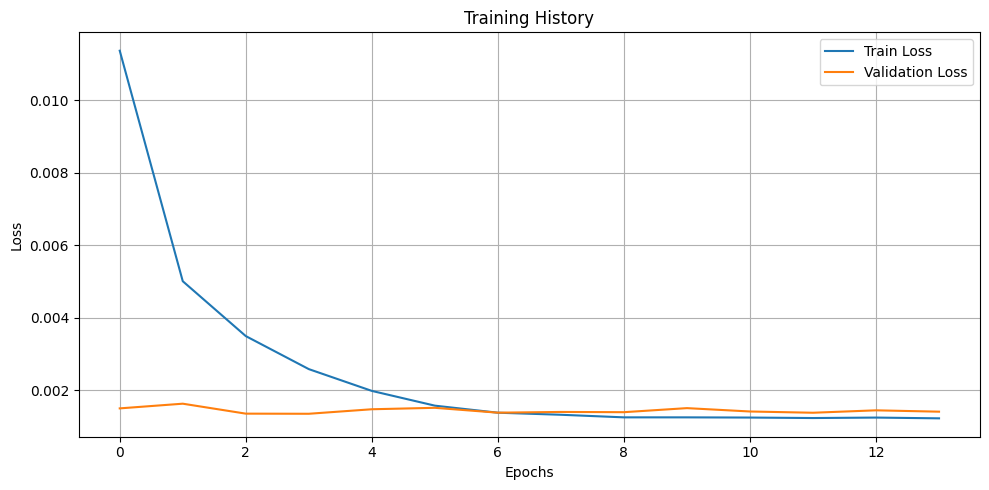

169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
  Metric       Value
0    MSE    0.001248
1    MAE    0.028046
2   RMSE    0.035321
3     R2    0.260060
4   MAPE    5.369473
5  SMAPE    5.409736
6    SAE  151.083580


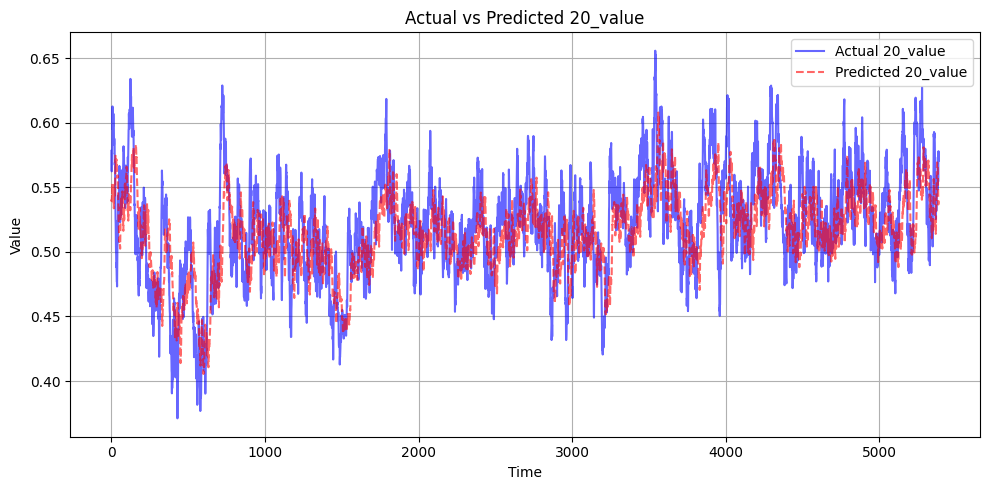

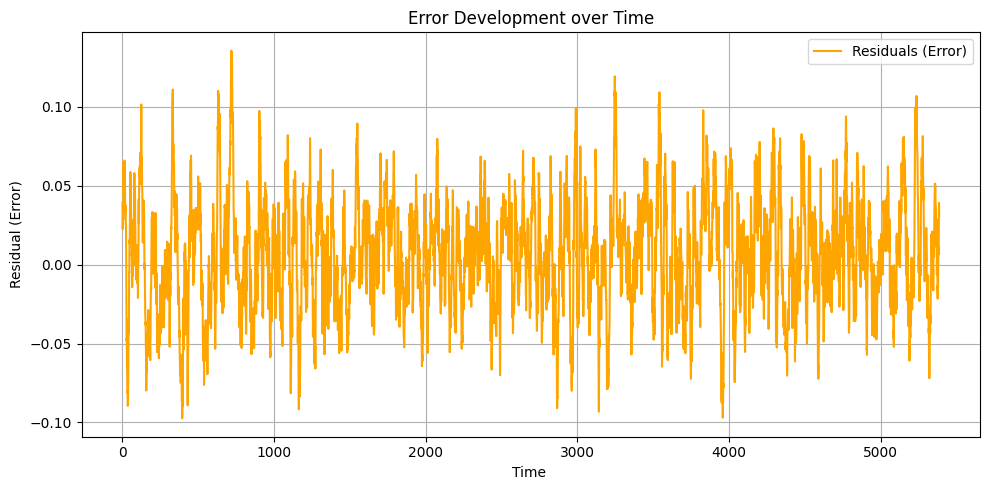

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Registered model 'Direct_Refiner_Model_simple_lstm_avg' already exists. Creating a new version of this model...
Created version '6' of model 'Direct_Refiner_Model_simple_lstm_avg'.


In [23]:
import importlib
from autoregression.models import RefineLSTM
importlib.reload(RefineLSTM)
from autoregression.models.RefineLSTM import build_average_refinement_lstm
dir_model = mlflow.keras.load_model("models:/Direct_LSTM_Model_simple/7") 
run_direct_refiner_experiment(build_average_refinement_lstm,
                              dir_model,
                              'simple_lstm_avg',
                              'ref_simple_lstm_avg',
                              X_train_dir=X_train_dir,
                              X_test_dir=X_test_dir,
                              X_val_dir=X_val_dir,
                              y_test_dir=y_test_dir,
                              y_train_dir=y_train_dir,
                              y_val_dir=y_val_dir,
                              output_steps=20,
                              units=64)

Hybrid: Direct Average + Refine LSTM Simple 

Model: "Avarege_Direct_LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 100, 512)       │       528,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 256)            │       656,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,660,734 (13.96 MB)

 Trainable params: 1,220,244 (4.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,440,490 (9.31 MB)

517/517 ━━━━━━━━━━━━━━━━━━━━ 39s 73ms/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step
(20, 1)


Model: "Refinement_LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ refinement_input (InputLayer)   │ (None, 20, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ refinement_lstm (LSTM)          │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ refined_20th_output (Dense)     │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
510/517 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0131 - mae: 0.0626 - mse: 0.0131
Epoch 1: val_loss improved from inf to 0.00137, saving model to models/saved/Direct_Refiner_Model_avg_lstm_simple.keras
517/517 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0130 - mae: 0.0622 - mse: 0.0130 - val_loss: 0.0014 - val_mae: 0.0294 - val_mse: 0.0014 - learning_rate: 0.0010
Epoch 2/30
515/517 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - mae: 0.0281 - mse: 0.0013
Epoch 2: val_loss did not improve from 0.00137
517/517 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0013 - mae: 0.0281 - mse: 0.0013 - val_loss: 0.0015 - val_mae: 0.0310 - val_mse: 0.0015 - learning_rate: 0.0010
Epoch 3/30
508/517 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - mae: 0.0278 - mse: 0.0013
Epoch 3: val_loss did not improve from 0.00137
517/517 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0013 - mae: 0.0278 - mse: 0.0013 - val_loss: 0.0014 - val_mae: 0.0300 - val_mse: 0.0014 - learning_rate: 0.0010
Epoch 4/30
5

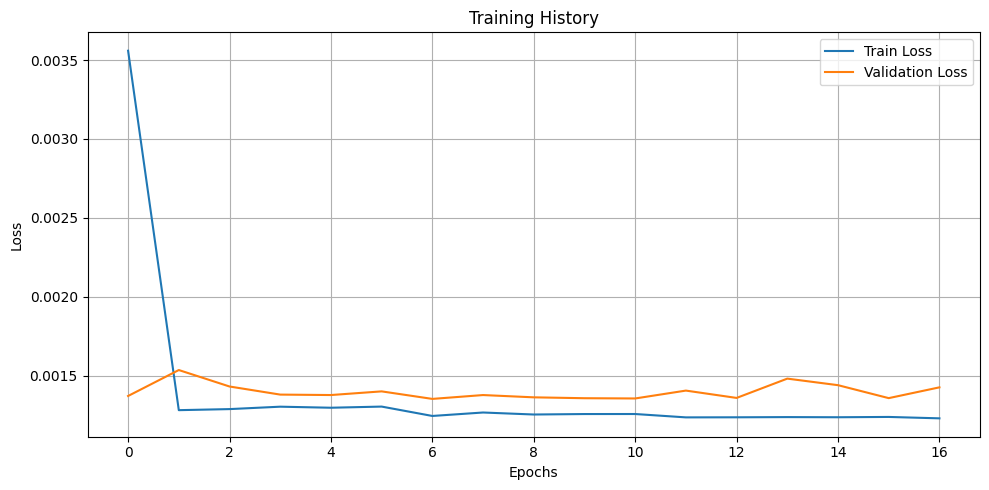

169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
  Metric       Value
0    MSE    0.001238
1    MAE    0.027908
2   RMSE    0.035182
3     R2    0.265881
4   MAPE    5.355531
5  SMAPE    5.379587
6    SAE  150.342313


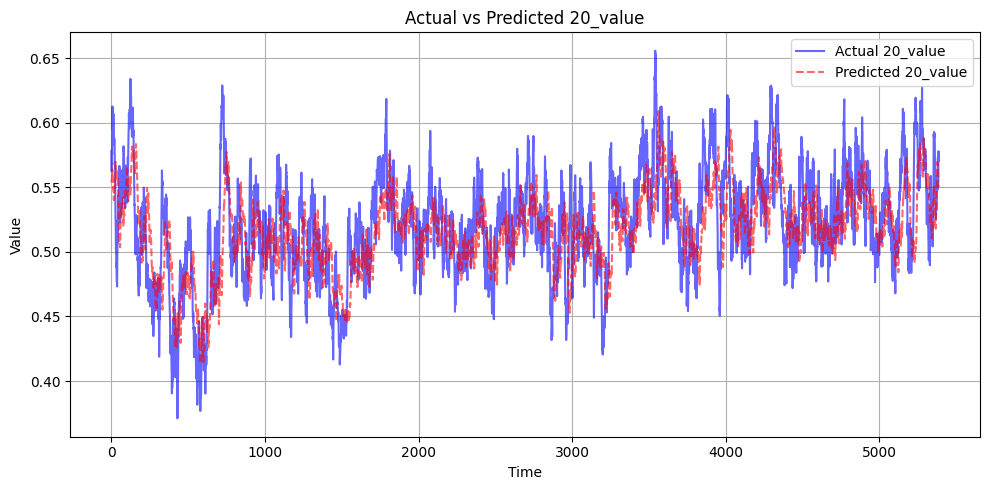

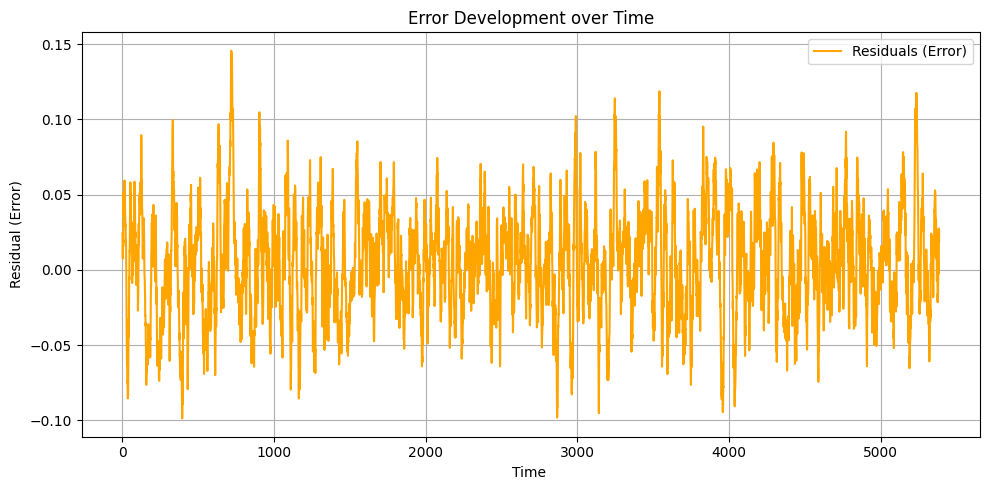

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Registered model 'Direct_Refiner_Model_avg_lstm_simple' already exists. Creating a new version of this model...
Created version '4' of model 'Direct_Refiner_Model_avg_lstm_simple'.


In [24]:
dir_model_av = mlflow.keras.load_model("models:/Direct_LSTM_Model_average/6") 
dir_model_av.summary()
run_direct_refiner_experiment(build_refinement_lstm_model_simple,
                              dir_model_av,
                              'avg_lstm_simple',
                              'ref_avg_lstm_simple',
                              X_train_dir=X_train_dir,
                              X_test_dir=X_test_dir,
                              X_val_dir=X_val_dir,
                              y_test_dir=y_test_dir,
                              y_train_dir=y_train_dir,
                              y_val_dir=y_val_dir,
                              output_steps=20,
                              units=64)

Hybrid: Direct Average + Refine LSTM Average 

517/517 ━━━━━━━━━━━━━━━━━━━━ 39s 75ms/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step
(20, 1)


Model: "Refiner_LSTM_Average"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ refinement_input (InputLayer)   │ (None, 20, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 20, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 20, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 20, 32)         │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 20, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,465 (126.82 KB)

 Trainable params: 32,465 (126.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
515/517 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0198 - mae: 0.0955 - mse: 0.0198
Epoch 1: val_loss improved from inf to 0.00349, saving model to models/saved/Direct_Refiner_Model_avg_lstm_avg.keras
517/517 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: 0.0197 - mae: 0.0954 - mse: 0.0197 - val_loss: 0.0035 - val_mae: 0.0497 - val_mse: 0.0035 - learning_rate: 0.0010
Epoch 2/30
515/517 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0051 - mae: 0.0570 - mse: 0.0051
Epoch 2: val_loss improved from 0.00349 to 0.00159, saving model to models/saved/Direct_Refiner_Model_avg_lstm_avg.keras
517/517 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.0051 - mae: 0.0569 - mse: 0.0051 - val_loss: 0.0016 - val_mae: 0.0316 - val_mse: 0.0016 - learning_rate: 0.0010
Epoch 3/30
515/517 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0036 - mae: 0.0473 - mse: 0.0036
Epoch 3: val_loss improved from 0.00159 to 0.00136, saving model to models/saved/Direct_Refiner_Model_avg_lstm_avg.keras
517/517 ━━━━━━━━━━━━━━━━

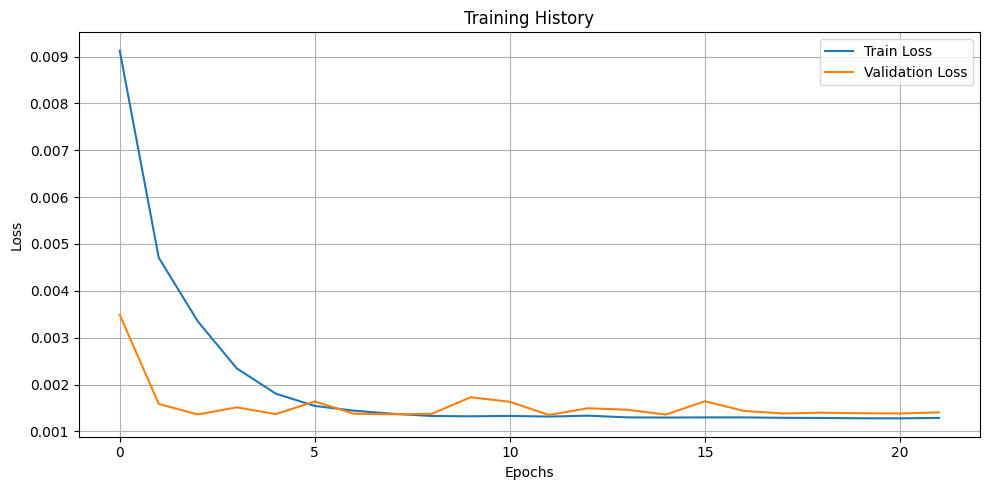

169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
  Metric       Value
0    MSE    0.001241
1    MAE    0.027964
2   RMSE    0.035229
3     R2    0.263927
4   MAPE    5.353449
5  SMAPE    5.392957
6    SAE  150.639978


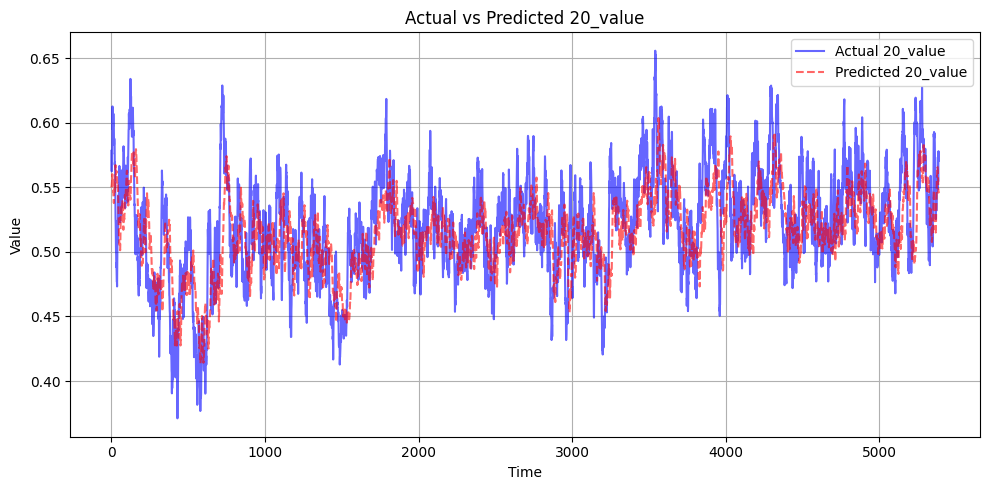

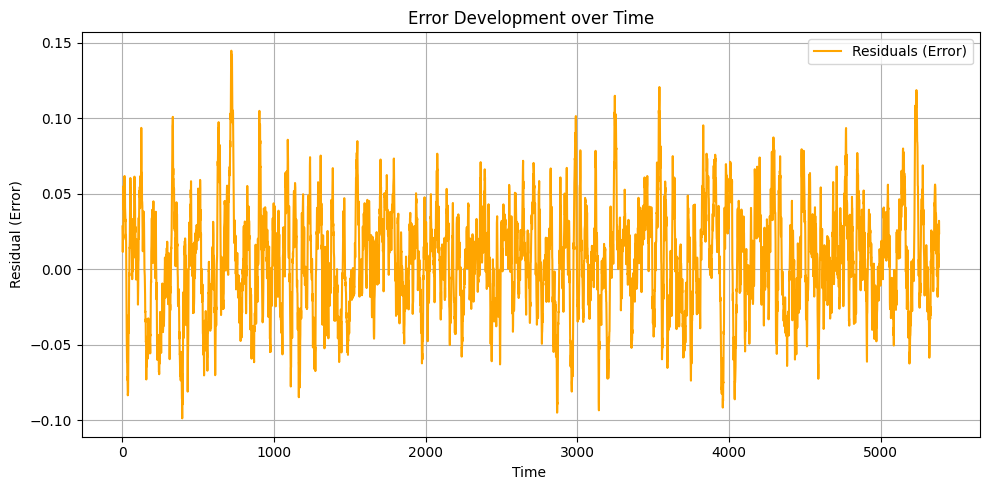

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Registered model 'Direct_Refiner_Model_avg_lstm_avg' already exists. Creating a new version of this model...
Created version '5' of model 'Direct_Refiner_Model_avg_lstm_avg'.


In [25]:
dir_model = mlflow.keras.load_model("models:/Direct_LSTM_Model_average/6") 
run_direct_refiner_experiment(build_average_refinement_lstm,
                              dir_model,
                              'avg_lstm_avg',
                              'ref_avg_lstm_avg',
                              X_train_dir=X_train_dir,
                              X_test_dir=X_test_dir,
                              X_val_dir=X_val_dir,
                              y_test_dir=y_test_dir,
                              y_train_dir=y_train_dir,
                              y_val_dir=y_val_dir,
                              output_steps=20,
                              units=64)